In [117]:
import numpy as np
import nbformat as nbf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.colors as pc

In [118]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [119]:
# Read the Vestiaire dataset into a dataframe
vestiaire_df = pd.read_csv('datasets/vestiaire_smaller.csv')

# Display the Head of the Data Frame
print(f"This data frame contains {len(vestiaire_df)} rows.")
vestiaire_df.head(3)



This data frame contains 13736 rows.


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,25775970,Germany,3,14
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,NaN,2709130,Italy,172,6
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,NaN,6048767,Germany,5,15


In [120]:
# Display the Tail of the Data Frame
vestiaire_df.tail(3)


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,NaN,3180346,Italy,11,1
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,NaN,19750106,Italy,62,184
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,NaN,5992355,Estonia,1,1


In [121]:
# Examine the rows and columns count
vestiaire_df.shape

(13736, 20)

# Data Cleaning

In [122]:
vestiaire_clean = vestiaire_df.copy()

In [123]:
vestiaire_clean.columns

Index(['product_id', 'product_type', 'product_name', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_id', 'seller_country', 'seller_products_sold',
       'seller_num_products_listed'],
      dtype='object')

In [124]:
vestiaire_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  13736 non-null  int64  
 1   product_type                13736 non-null  object 
 2   product_name                13736 non-null  object 
 3   product_gender_target       13736 non-null  object 
 4   product_category            13727 non-null  object 
 5   product_season              13736 non-null  object 
 6   product_condition           13736 non-null  object 
 7   product_like_count          13736 non-null  int64  
 8   sold                        13736 non-null  bool   
 9   brand_name                  13736 non-null  object 
 10  product_material            13736 non-null  object 
 11  product_color               13736 non-null  object 
 12  price_usd                   13736 non-null  float64
 13  seller_price                137

In [125]:
vestiaire_clean.drop(columns=['buyers_fees'], inplace=True)

In [126]:
(vestiaire_clean.isna().mean() * 100).sum()

0.06552125800815375

In [127]:
vestiaire_clean.isna().mean() * 100

product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
product_gender_target         0.000000
product_category              0.065521
product_season                0.000000
product_condition             0.000000
product_like_count            0.000000
sold                          0.000000
brand_name                    0.000000
product_material              0.000000
product_color                 0.000000
price_usd                     0.000000
seller_price                  0.000000
seller_earning                0.000000
seller_id                     0.000000
seller_country                0.000000
seller_products_sold          0.000000
seller_num_products_listed    0.000000
dtype: float64

In [128]:
vestiaire_clean = vestiaire_clean.dropna(subset=['product_category'])

In [129]:
vestiaire_clean.isna().mean() * 100

product_id                    0.0
product_type                  0.0
product_name                  0.0
product_gender_target         0.0
product_category              0.0
product_season                0.0
product_condition             0.0
product_like_count            0.0
sold                          0.0
brand_name                    0.0
product_material              0.0
product_color                 0.0
price_usd                     0.0
seller_price                  0.0
seller_earning                0.0
seller_id                     0.0
seller_country                0.0
seller_products_sold          0.0
seller_num_products_listed    0.0
dtype: float64

# Exploratory Data Analysis

In [130]:
gender_count = vestiaire_clean['product_gender_target'].value_counts()

fig_gender = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'label+value',
              'labels': array(['Women', 'Men'], dtype=object),
              'marker': {'line': {'color': '#000000', 'width': 2}},
              'textfont': {'size': 20},
              'textinfo': 'percent',
              'type': 'pie',
              'values': array([8453, 5274], dtype=int64)}],
    'layout': {'template': '...', 'title': {'font': {'size': 24}, 'text': 'Gender Distribution of Buyers'}}
})

In [131]:
# Get the HTML string for the Plotly graph
plotly_gender_html = fig_gender.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_gender_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_gender_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_gender_graph.html


In [132]:
# Aggregate the data to get the count of sellers per country
seller_counts = vestiaire_clean['seller_country'].value_counts().reset_index()
seller_counts.columns = ['country', 'seller_count']

# Create a list of Countries with Sellers
country_list = seller_counts['country'].tolist()
print(country_list)
print(len(country_list))


['Italy', 'France', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Poland', 'Romania', 'Sweden', 'Greece', 'Bulgaria', 'Netherlands', 'Belgium', 'Austria', 'Portugal', 'Australia', 'Hong Kong', 'Ireland', 'Denmark', 'Lithuania', 'Switzerland', 'Finland', 'Latvia', 'Croatia', 'Czech Republic', 'Hungary', 'Monaco', 'Cyprus', 'Slovakia', 'Canada', 'Luxembourg', 'Singapore', 'Estonia', 'Slovenia', 'Japan', 'United Arab Emirates', 'Malaysia', 'South Korea', 'Philippines', 'Malta', 'Turkey', 'China', 'Qatar', 'Kazakhstan', 'Lebanon', 'Israel', 'Indonesia', 'Bahrain', 'Norway', 'Saudi Arabia', 'New Zealand']
51


In [133]:
# Read the CSV file containing country coordinates
country_coords_file = pd.read_csv('datasets\country_coords.csv')

# Filter the DataFrame to only include countries in country_list
filtered_coords_df = country_coords_file[country_coords_file['country'].isin(country_list)]

# Create the dictionary
country_coords = {
    row['country']: {'lat': row['lat'], 'lon': row['lon']}
    for _, row in filtered_coords_df.iterrows()
}

# Display the resulting dictionary
print(country_coords)

# Check if the lengths match
if len(country_coords) == len(country_list):
    print("The lengths match!")
else:
    print(f"The lengths do not match. Dictionary length: {len(country_coords)}, List length: {len(country_list)}")

{'United Arab Emirates': {'lat': 23.424076, 'lon': 53.847818}, 'Austria': {'lat': 47.516231, 'lon': 14.550072}, 'Australia': {'lat': -25.274398, 'lon': 133.775136}, 'Belgium': {'lat': 50.503887, 'lon': 4.469936}, 'Bulgaria': {'lat': 42.733883, 'lon': 25.48583}, 'Bahrain': {'lat': 25.930414, 'lon': 50.637772}, 'Canada': {'lat': 56.130366, 'lon': -106.346771}, 'Switzerland': {'lat': 46.818188, 'lon': 8.227512}, 'China': {'lat': 35.86166, 'lon': 104.195397}, 'Cyprus': {'lat': 35.126413, 'lon': 33.429859}, 'Czech Republic': {'lat': 49.817492, 'lon': 15.472962}, 'Germany': {'lat': 51.165691, 'lon': 10.451526}, 'Denmark': {'lat': 56.26392, 'lon': 9.501785}, 'Estonia': {'lat': 58.595272, 'lon': 25.013607}, 'Spain': {'lat': 40.463667, 'lon': -3.74922}, 'Finland': {'lat': 61.92411, 'lon': 25.748151}, 'France': {'lat': 46.227638, 'lon': 2.213749}, 'United Kingdom': {'lat': 55.378051, 'lon': -3.435973}, 'Greece': {'lat': 39.074208, 'lon': 21.824312}, 'Hong Kong': {'lat': 22.396428, 'lon': 114.109

In [134]:
# Create the Coordinate DataFrame
coords_df = pd.DataFrame.from_dict(country_coords, orient='index').reset_index()
coords_df.columns = ['country', 'lat', 'lon']

# Merge the data
seller_location_data = pd.merge(seller_counts, coords_df, on='country')

In [135]:
# Create Bubble Map
fig_seller_loc = px.scatter_geo(
    seller_location_data,
    lat='lat',
    lon='lon',
    size='seller_count',
    hover_name='country',
    size_max=50,
    projection="natural earth",
    title='Seller Locations on Vestiaire Platform'
)


In [136]:
# Get the HTML string for the Plotly graph
plotly_seller_loc_html = fig_seller_loc.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file (optional)
with open("plotly_graph.html", "w") as file:
    file.write(plotly_seller_loc_html)

## Russell's Visualizations and Transformations

### Seasonal sales of products by material

In [137]:
#Gathering and Formatting the Data
clothing_df = vestiaire_clean[vestiaire_clean['product_category'].isin(['Women Clothing', 'Men Clothing'])]

#The Cloth material doesnt make much sense as many of the materials are cloth so I am removing it from our count. (That material only occured a few times in the spring/summer season anyway so we wont lose much data.)
clothing_df = clothing_df[clothing_df['product_material'] != 'Cloth']

#Counting the quantity of clothing sold for each material
seasonal_materials_df = clothing_df.groupby(['product_season', 'product_material']).size().reset_index(name='count')

seasonal_materials_df.head()

,product_season,product_material,count
0,All seasons,Alligator,1
1,All seasons,Cashmere,1
2,All seasons,Cotton,2640
3,All seasons,Cotton - elasthane,136
4,All seasons,Crocodile,1


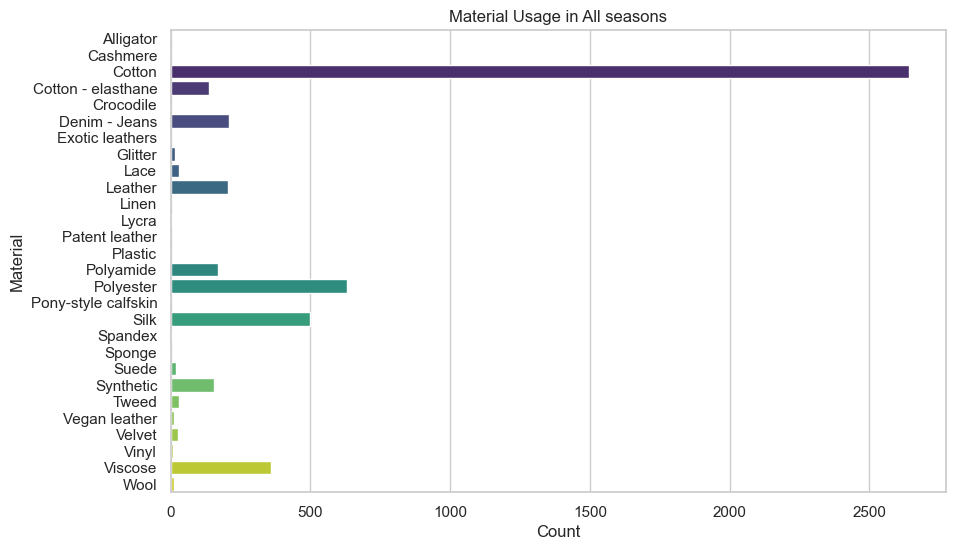

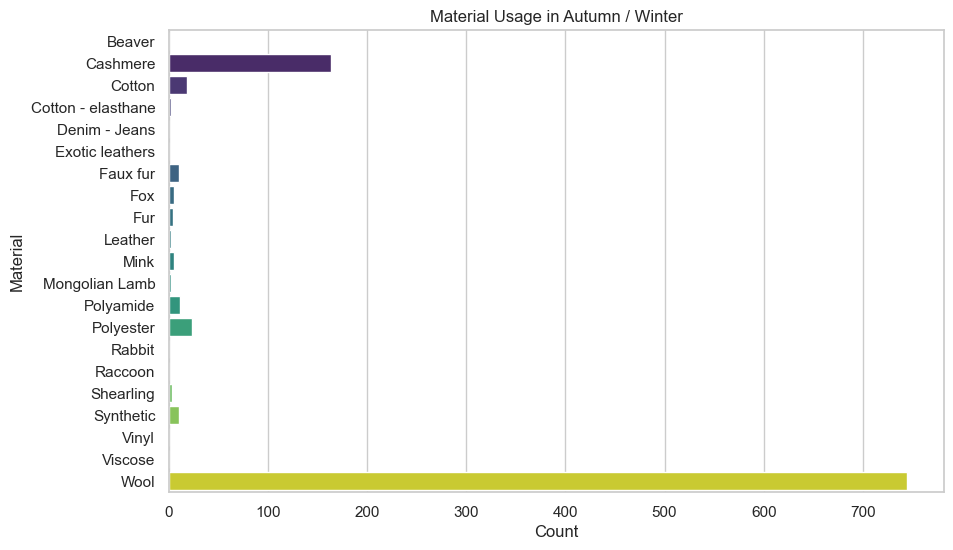

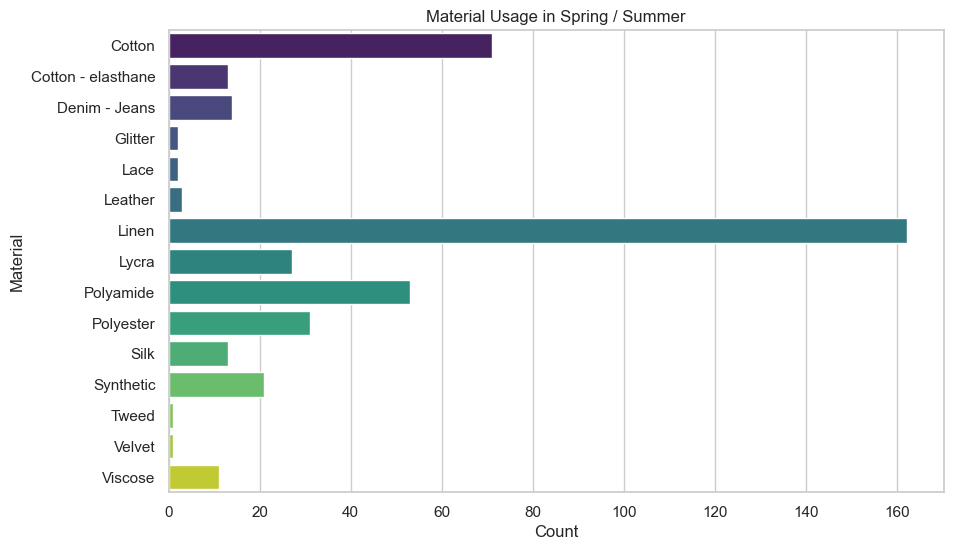

In [138]:
# Set the style for the plots
sns.set(style="whitegrid")

# List of seasons
seasons = ['All seasons', 'Autumn / Winter', 'Spring / Summer']

# Create a bar plot for each season
for season in seasons:
    plt.figure(figsize=(10, 6))
    season_data = seasonal_materials_df[seasonal_materials_df['product_season'] == season]
    sns.barplot(x='count', y='product_material', data=season_data, palette='viridis')
    plt.title(f'Material Usage in {season}')
    plt.xlabel('Count')
    plt.ylabel('Material')
    plt.show()

**Annalysis**\
We can see that it is best to sell Wool in the Autumn/Winter, Linen in the Spring/Summer, and of course Cotton is popular in any season.

### Untitled Price/Margin Visualization

In [143]:
# Ensure the DataFrame contains the necessary columns
if 'price_usd' in vestiaire_clean.columns and 'seller_earning' in vestiaire_clean.columns:
    # Calculate the percentage of profit
    vestiaire_clean['profit_percentage'] = (vestiaire_clean['seller_earning'] / vestiaire_clean['price_usd']) * 100

    # Handle potential division by zero errors by replacing infinities with NaN
    vestiaire_clean['profit_percentage'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
else:
    print("The DataFrame does not contain the necessary columns 'price_usd' and 'seller_earning'.")

display(vestiaire_clean.head())
display(vestiaire_clean.tail())

,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,profit_percentage
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,25775970,Germany,3,14,79.488495
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,2709130,Italy,172,6,71.294838
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,6048767,Germany,5,15,72.500787
3,43244097,Trousers,Trousers Gucci Beige size M International in C...,Women,Women Clothing,All seasons,Very good condition,4,True,Gucci,Cotton,Beige,145.75,119.44,103.91,10050555,Spain,11,15,71.293310
4,43246432,Lingerie set,Lingerie set Agent Provocateur Black in Polyam...,Women,Women Clothing,All seasons,Very good condition,0,True,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,5594414,United Kingdom,47,13,76.575763


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,profit_percentage
13731,41542694,Heels,Heels Prada Brown size 37 IT in Suede,Women,Women Shoes,All seasons,Good condition,7,True,Prada,Suede,Brown,29.16,24.30,10.07,22898175,Switzerland,179,44,34.533608
13732,41540056,Simple pump patent leather heels,Simple pump patent leather heels Christian Lou...,Women,Women Shoes,All seasons,Very good condition,3,True,Christian Louboutin,Patent leather,Black,332.28,276.90,276.90,16266013,France,1,0,83.333333
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,3180346,Italy,11,1,72.500558
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,19750106,Italy,62,184,56.259781
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,5992355,Estonia,1,1,83.331617


In [163]:
#Cutting down the data to only neccessary columns
profit_df = vestiaire_clean[['product_name', 'brand_name', 'product_season', 'price_usd', 'seller_earning', 'profit_percentage', 'product_color']]

# Sort the DataFrame by 'profit_percentage' in descending order
profit_df = profit_df.sort_values(by='profit_percentage', ascending=False)

# Reset the index of the sorted DataFrame
profit_df = profit_df.reset_index(drop=True)

profit_df = profit_df[(profit_df['profit_percentage'] != 100) & (profit_df['profit_percentage'] != 0)]

# Display the head and tail of the sorted DataFrame
display(profit_df.head())
display(profit_df.tail())

,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
8,Leather purse Louis Vuitton Brown in Leather,Louis Vuitton,All seasons,200.00,194.00,97.000000,Brown
9,Leather mules & clogs Gucci Black size 37 EU i...,Gucci,All seasons,129.00,125.13,97.000000,Black
10,Leather biker jacket Burberry Green size 8 UK ...,Burberry,All seasons,171.00,165.87,97.000000,Green
11,Sunglasses Dita Black in Plastic,Dita,All seasons,354.00,343.38,97.000000,Black
12,101801 wool coat Max Mara Camel size 0 US in W...,Max Mara,Autumn / Winter,1227.27,1190.45,96.999845,Camel


,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
13713,Top Saint James Multicolour size XS Internatio...,Saint James,All seasons,22.39,2.22,9.915141,Multicolour
13714,T,Katie Eary,All seasons,25.44,2.49,9.787736,Multicolour
13715,Leather high trainers Pierre Hardy Black size ...,Pierre Hardy,All seasons,50.00,4.39,8.780000,Black
13716,Sunglasses Dolce & Gabbana Grey in Plastic,Dolce & Gabbana,All seasons,67.81,5.94,8.759770,Grey
13717,Scarf Burberry Multicolour in Cotton,Burberry,Autumn / Winter,62.70,1.74,2.775120,Multicolour


In [170]:
fig = px.scatter(profit_df.query("profit_percentage"), x="price_usd", y="seller_earning",
                 size="pop", color="season",
                 hover_name="product_name", log_x=True, size_max=60)
fig.show()

KeyError: '[96.99984518484116, 96.99721964782205, 90.92002405291642, 90.91428571428571, 90.9111111111111, 90.91, 90.9097605893186, 90.90932804674456, 90.90909090909092, 90.9090909090909, 90.90871845296623, 90.90825688073394, 90.90350338045482, 89.28571428571429, 88.99999999999999, 88.59784283513096, 88.4070058381985, 88.3737776168055, 88.37101984310107, 88.31168831168831, 88.261253309797, 88.20779220779221, 88.19169960474308, 88.18616512591649, 88.1852230166837, 88.18518518518518, 88.18471337579618, 88.18461538461538, 88.18433643918408, 88.18432333129209, 88.18421052631578, 88.18400000000001, 88.18396226415094, 88.18376068376068, 88.1835718451393, 88.18333333333334, 88.18333333333332, 88.18322703701496, 88.18306010928961, 88.18305084745762, 88.18297872340425, 88.18295739348372, 88.18288241415193, 88.18285714285715, 88.18278601261159, 88.18277865821447, 88.18270708199468, 88.1826484018265, 88.18260869565218, 88.18258933305059, 88.1825, 88.18245614035088, 88.18244087191265, 88.18240582946466, 88.18235294117646, 88.18233618233617, 88.18231441048036, 88.18227848101266, 88.18223443223442, 88.18222222222222, 88.18218623481782, 88.18217054263565, 88.18214285714285, 88.18212765957448, 88.18210854770155, 88.1821052631579, 88.18208955223882, 88.18205128205129, 88.18204488778055, 88.18202247191012, 88.18201330757674, 88.182, 88.18195395677314, 88.18194444444444, 88.18189008406401, 88.18185303024495, 88.1818181818182, 88.18181818181819, 88.18181818181817, 88.18175765645806, 88.18175689341334, 88.18172377985462, 88.18166666666667, 88.18166089965398, 88.1816400235169, 88.18163265306121, 88.18162162162162, 88.18161765559516, 88.18153846153845, 88.18149210903873, 88.18148148148148, 88.18144329896907, 88.18139534883721, 88.18133333333333, 88.18126148193511, 88.18126148193508, 88.18125, 88.18117480537863, 88.18110236220474, 88.18104519589247, 88.18103448275862, 88.18097876269621, 88.18095238095238, 88.18085106382979, 88.18082191780823, 88.18064516129033, 88.18055555555556, 88.18048780487806, 88.18032786885246, 88.18021201413428, 88.18018018018017, 88.18, 88.17999999999999, 88.17980840088431, 88.1798037353593, 88.17948717948718, 88.1794591641628, 88.17931034482758, 88.17857142857143, 88.12615955473099, 88.06818181818183, 88.04581245526128, 88.03827751196172, 88.02884615384615, 87.98166032582186, 87.97968948344888, 87.97653958944281, 87.9519259186287, 87.92846497764532, 87.91208791208793, 87.91, 87.9038317054846, 87.87878787878788, 87.81443298969073, 87.73784355179704, 87.73194783161912, 87.70053475935828, 87.67609420367782, 87.66233766233765, 87.57777777777777, 87.54208754208754, 87.50284543592078, 87.5, 87.49146369223766, 87.48148991912518, 87.45977011494254, 87.45684695051783, 87.37647058823529, 87.36717827626919, 87.33333333333333, 87.32057416267943, 87.27272727272727, 87.16250000000001, 87.12121212121212, 87.1139240506329, 87.06786171574905, 87.05776405506239, 87.01298701298701, 87.00356571990656, 87.00080986232341, 87.00000000000001, 86.99999999999999, 86.99848152522355, 86.96052631578948, 86.95192815636557, 86.89839572192514, 86.85135135135134, 86.64772727272727, 86.62857142857143, 86.58008658008657, 86.52864849103368, 86.46080760095012, 86.44421272158499, 86.43815201192251, 86.36363636363636, 86.2923076923077, 86.28659476117102, 86.20689655172414, 86.12440191387559, 86.11111111111111, 86.06451612903226, 86.03896103896103, 85.98360655737706, 85.9504132231405, 85.91666666666666, 85.86536847406411, 85.45454545454545, 85.43830872972481, 85.34322820037106, 85.22727272727273, 85.01960784313725, 85.0127676291495, 84.9, 84.84848484848484, 84.82173913043478, 84.7107438016529, 84.6938775510204, 84.5360824742268, 84.53191489361701, 84.375, 84.24444444444444, 84.0909090909091, 84.06756448299474, 84.00331308669243, 84.00219699743683, 84.0007904096957, 84.00000000000001, 83.93023255813954, 83.91608391608392, 83.76190476190476, 83.73205741626795, 83.39999999999999, 83.35941575378195, 83.35132218024825, 83.3445115135256, 83.34226605209561, 83.34177215189872, 83.34174659262999, 83.34087822544137, 83.34030975303473, 83.3398544487049, 83.33935235343687, 83.33891493636973, 83.33854981742306, 83.33844737649585, 83.33816285134745, 83.3379849288306, 83.3379361134125, 83.33747823924398, 83.3373771685066, 83.3368576866145, 83.33673538817446, 83.33646322378716, 83.33631324870375, 83.33623138004984, 83.3362024444827, 83.33619948409286, 83.33613191389328, 83.33603151475906, 83.33587282238814, 83.33572186075841, 83.33556896937179, 83.33515303708556, 83.33507216136323, 83.33486759335972, 83.33475601081236, 83.334691549181, 83.3346595581019, 83.33455990579924, 83.33455621591214, 83.33447920247508, 83.33446243479439, 83.33437951164396, 83.33425388934917, 83.33422963162141, 83.33421251604508, 83.33415414922433, 83.33414586583463, 83.33407854534615, 83.3340677742035, 83.33394274013675, 83.3338558485124, 83.33372144470577, 83.33333333333334, 83.33333333333333, 83.3330391655047, 83.33300069853308, 83.3329800538398, 83.33283497293903, 83.33275388519974, 83.33254505037128, 83.33217051559338, 83.33214464018258, 83.33173858960865, 83.33161741995264, 83.33153580672995, 83.33143052859916, 83.33142955051687, 83.33125000000001, 83.33118639701146, 83.33115303105623, 83.33110665775996, 83.33079616379968, 83.33054253181514, 83.33051849349773, 83.33044633061955, 83.32971093240602, 83.32944197992062, 83.3290455364034, 83.32899418554194, 83.3284799068142, 83.32774461806719, 83.32723948811702, 83.327239488117, 83.32712369597614, 83.31160365058669, 83.2739681956062, 83.26103597856597, 83.22663252240717, 83.11688311688312, 83.02631578947368, 82.8032345013477, 82.68243804682535, 82.55813953488372, 82.38636363636363, 82.34285714285714, 82.33256036011458, 82.3319353901092, 82.33164868187406, 82.33148019457957, 82.33148019457956, 82.32834507042254, 82.11881767632426, 81.95501437510569, 81.9545979222778, 81.95342156560993, 81.9523119483599, 81.95172413793104, 81.95130557515878, 81.95109439124487, 81.95041624736986, 81.95009343739694, 81.95, 81.94996028594123, 81.94985063818231, 81.94980018228985, 81.94934273805707, 81.94916126376452, 81.94903363056171, 81.94901857462786, 81.9489309337025, 81.94841817096516, 81.94829178208678, 81.94823238820562, 81.94809160305344, 81.94792742292373, 81.94732169280852, 81.94701470731471, 81.94678342876391, 81.94644202451887, 81.94599888080582, 81.94585448392556, 81.9453125, 81.94157303370785, 81.94019933554817, 81.93959317854942, 81.92681609505806, 81.92620020178867, 81.92349726775956, 81.81818181818183, 81.69199594731509, 80.89999999999999, 80.83846659888762, 80.83770711124832, 80.8372641509434, 80.83724569640063, 80.8368458928755, 80.8367575644378, 80.83665638401925, 80.83662194159432, 80.83653435766112, 80.83638715240353, 80.8362369337979, 80.83602083850161, 80.83589743589744, 80.8356487180389, 80.83560399636694, 80.83554376657824, 80.83549993390032, 80.83546798029558, 80.83544412484437, 80.83543999036958, 80.83533759605797, 80.8352910467241, 80.835282325426, 80.83507663407762, 80.8350261948038, 80.83501603515857, 80.83501006036218, 80.835, 80.83495474156163, 80.83493305469833, 80.83492063492064, 80.83488894299707, 80.83488739061828, 80.83488008152274, 80.83486985978303, 80.83485543725219, 80.83484827296881, 80.83471154781593, 80.83467392649425, 80.83464652502309, 80.83463745435577, 80.83463745435576, 80.8346141306879, 80.83457902604374, 80.8345500653193, 80.83453385470261, 80.83453237410072, 80.83449463070744, 80.83447116899487, 80.83444619804945, 80.83443801018628, 80.83443305248198, 80.8344154763094, 80.83438685208596, 80.83438642030124, 80.83437746531162, 80.83437500000001, 80.83436991675438, 80.83434099153567, 80.83433966406851, 80.83433752223561, 80.83433438899203, 80.83431952662723, 80.83431142410016, 80.83430488810531, 80.83428571428571, 80.8342827096661, 80.83427669719735, 80.8342555022747, 80.83422134267012, 80.83420903726457, 80.83418022859212, 80.83416728540531, 80.83415220002183, 80.83414634146342, 80.83412322274881, 80.83409487413807, 80.83408351222215, 80.83407495303075, 80.83407275953859, 80.83406736931627, 80.83405912188124, 80.83405519118921, 80.83405065011553, 80.8340372560352, 80.83402375034522, 80.83402277808092, 80.83401314842364, 80.83400809716599, 80.834, 80.83399254153012, 80.83398083398083, 80.83397372561936, 80.83395701913825, 80.83389149363697, 80.8338733192937, 80.83386280481125, 80.83383268871094, 80.83382613837966, 80.83380281690141, 80.8338028169014, 80.83377629280888, 80.83376940519798, 80.8337680403408, 80.83376272059772, 80.83376024590164, 80.833744449926, 80.83373806054719, 80.83372147182115, 80.83371756717105, 80.83371500221493, 80.83370461127201, 80.83368972522186, 80.83368900270308, 80.83368689011455, 80.83365564844843, 80.83365507409938, 80.83359415753782, 80.83359288727809, 80.83359061438716, 80.83358010068108, 80.8335593526806, 80.83355935268058, 80.83353924717899, 80.83353924717898, 80.83353460537262, 80.83352899741723, 80.83352168315956, 80.833520305138, 80.83351421749512, 80.83348520746006, 80.83348401349046, 80.83348359655915, 80.83348302496856, 80.83345166598451, 80.83344976945648, 80.8334403493001, 80.83343676306318, 80.83342893197202, 80.83341257012457, 80.8333964694295, 80.83338853925142, 80.8333870032846, 80.83338679668955, 80.83338462485384, 80.83338077076337, 80.83336498651576, 80.83336296085612, 80.8333605246843, 80.8333523388145, 80.83333333333334, 80.83333333333333, 80.83331180740319, 80.83330790589814, 80.83329670812638, 80.83329156851934, 80.83327377974702, 80.83326929480776, 80.83326069903252, 80.83325451622056, 80.83324696859778, 80.83324610070134, 80.8332442353612, 80.83321812065071, 80.83319833684324, 80.83319014071063, 80.83318987777587, 80.83318239449375, 80.83317035008801, 80.83316481294237, 80.83316247883302, 80.83315576390369, 80.83314703033014, 80.83314655310429, 80.8331442116146, 80.83314160083852, 80.83313170416969, 80.83311000210053, 80.8330900243309, 80.83305923511645, 80.83305490589152, 80.83301896019337, 80.83301314070546, 80.83301000354258, 80.83300198807156, 80.83299342850668, 80.83297766396358, 80.8329707708737, 80.83295846453741, 80.8329411764706, 80.8329201784829, 80.83290222452146, 80.83288999231543, 80.8328794670912, 80.8328685629299, 80.83285714285715, 80.83285398037266, 80.83283671036948, 80.83282302510716, 80.8328125, 80.83278909141285, 80.83277765429354, 80.83277517302969, 80.83277367360644, 80.83274523641497, 80.83274432949945, 80.8327359762839, 80.83273510409188, 80.83273176070605, 80.83272727272727, 80.8327258693881, 80.83270345175109, 80.83268127282211, 80.83267571214012, 80.83265306122449, 80.83262890955199, 80.83262678373833, 80.83258081993858, 80.83256487946254, 80.83256335797255, 80.83256066758321, 80.83255086071988, 80.8325296823866, 80.83252662149081, 80.83249808383938, 80.83249055197743, 80.8324898785425, 80.8324890603781, 80.83246874285615, 80.83245660178852, 80.83245053480505, 80.83244769904935, 80.83241048357328, 80.83238743851683, 80.83236164678446, 80.832358837287, 80.83235638921454, 80.83235233017105, 80.83235062893081, 80.83231901698255, 80.83230731346958, 80.83230121377261, 80.83229504111637, 80.83226905065986, 80.83226632522407, 80.83225806451614, 80.83222127866067, 80.83219820607059, 80.83218792952643, 80.83217011671766, 80.83215379044735, 80.83215090560053, 80.83214403337358, 80.83214285714287, 80.83212294429087, 80.83212209302324, 80.83211915169176, 80.83203328133125, 80.83199264536887, 80.83198852429622, 80.8319788092228, 80.83194507547074, 80.83194119612429, 80.83185245665435, 80.83184837194234, 80.83181818181818, 80.83179209939773, 80.83176842394539, 80.83176033611399, 80.83169827774145, 80.83167584069568, 80.83166658914368, 80.83165660630449, 80.83164687464203, 80.83163116428364, 80.83158024996905, 80.83157894736843, 80.83157596550313, 80.83149627996693, 80.83146389193834, 80.83142731030054, 80.83139196272568, 80.8313797722706, 80.83133971291868, 80.83130415085792, 80.8313011045761, 80.83125000000001, 80.83118160580352, 80.83117324607997, 80.83115891300197, 80.83112493758881, 80.83111111111111, 80.83108011953892, 80.83099263341991, 80.83091226031378, 80.83083810575889, 80.83056833993363, 80.83054253181513, 80.83049937354572, 80.83030198048387, 80.8302417807343, 80.8299566857622, 80.82993438552936, 80.82991277578246, 80.82960347979575, 80.82957976538138, 80.82913828842167, 80.82873263362251, 80.82854378876686, 80.82494969818914, 80.80998987512655, 80.78884733083984, 80.78303165616776, 80.77393573642146, 80.76711952792644, 80.73192599233842, 80.72727272727272, 80.71817800754508, 80.71082656160223, 80.70175438596492, 80.7000765110941, 80.69916297390449, 80.68473845643705, 80.66428571428573, 80.65974547890154, 80.64956527987354, 80.64787547328565, 80.62838569880823, 80.62463851937535, 80.61581016159558, 80.59494225990352, 80.59263605691652, 80.5913348946136, 80.58452048758996, 80.56133056133056, 80.55990262563031, 80.52406336812074, 80.51467348197761, 80.49973323848481, 80.4920646973954, 80.45932867347723, 80.45800353492662, 80.45101208342955, 80.42944227094897, 80.4140625, 80.40688575899844, 80.39308176100629, 80.3921568627451, 80.34400000000001, 80.3394172270253, 80.32431413217688, 80.32364543917559, 80.32180209171361, 80.31062934800194, 80.28685518702632, 80.28301886792453, 80.26176498893274, 80.24293505205752, 80.22425249169434, 80.21322378716745, 80.20505441136794, 80.20380888740394, 80.20352365934178, 80.1725596345796, 80.17019592321392, 80.14002732240438, 80.12507495930781, 80.11701805709674, 80.09842859609739, 80.07826086956523, 80.07318985797683, 80.07160946642215, 80.04735920930712, 80.03100775193799, 80.02826605423549, 80.00000000000001, 79.99821810406273, 79.99463423358971, 79.98953427524857, 79.94756351143658, 79.93636363636364, 79.932806683011, 79.92448823078284, 79.92238906698161, 79.91578176492128, 79.91210204737914, 79.89859154929577, 79.89851426605604, 79.8970316145121, 79.86713065485606, 79.86594093337366, 79.86549659640777, 79.86487309026722, 79.8648546048136, 79.86457371498923, 79.86407766990291, 79.8639994718426, 79.86393948887795, 79.86389721192423, 79.86383329894781, 79.86378956878278, 79.86375776490712, 79.86373359389442, 79.86372485399092, 79.86370875152772, 79.86369928655095, 79.8636714395953, 79.86365267312523, 79.86363547049692, 79.86362667803111, 79.86355633802818, 79.86355633802816, 79.86349645358433, 79.86348122866896, 79.86341463414635, 79.863394889957, 79.86338797814207, 79.86333727011979, 79.86315789473684, 79.86307324494675, 79.86299880395782, 79.86296296296295, 79.86290375062366, 79.86286768800012, 79.86285714285714, 79.86282402780198, 79.86276462184509, 79.86266666666667, 79.86266094420601, 79.86263131681666, 79.86260869565217, 79.86255924170615, 79.86251069821374, 79.8625, 79.86243702698351, 79.86243473937185, 79.86241318298255, 79.86238464811257, 79.86234021632251, 79.8623009572913, 79.86227374672268, 79.86225108843051, 79.86222222222223, 79.86220612259393, 79.86217457886676, 79.86216224920292, 79.86212619885136, 79.86212430697401, 79.8621234207969, 79.86208920187794, 79.86206896551724, 79.86205879098588, 79.86205761015724, 79.8620521908336, 79.86204631302348, 79.86203629688842, 79.862, 79.86199846664962, 79.86198659677525, 79.86195858757627, 79.86192326555249, 79.86190476190477, 79.8618894392422, 79.86188579017265, 79.86186348862405, 79.86186056550831, 79.86183310533515, 79.8618159106878, 79.86179881604717, 79.86175115207374, 79.86174488825026, 79.86173139447641, 79.86170324600236, 79.86166666666666, 79.86165451187831, 79.86161073257438, 79.861603540602, 79.86157718120805, 79.86156958790332, 79.86153846153846, 79.86149584487534, 79.86144063775268, 79.86140375520907, 79.86135672349154, 79.86127384355814, 79.86127004806254, 79.86126283591872, 79.86123529201387, 79.86122338992186, 79.8611976154462, 79.86118948199977, 79.86116081013384, 79.8611474980351, 79.86111111111111, 79.8611111111111, 79.86107124404387, 79.86102174752286, 79.86097576820633, 79.86096370197411, 79.86089001004139, 79.8608797067644, 79.86078886310905, 79.86077066379056, 79.86076448180745, 79.86075949367088, 79.8607142857143, 79.86069848814947, 79.86060606060606, 79.86030267753202, 79.86006996501749, 79.86, 79.85991806528347, 79.8594737338489, 79.85909247672069, 79.85908649173955, 79.8590021691974, 79.85836034089544, 79.85750160602699, 79.84, 79.83994664888297, 79.82159624413147, 79.81176470588235, 79.7979797979798, 79.7925704989154, 79.79127134724857, 79.77142857142857, 79.76749385200091, 79.76133651551312, 79.76110739004243, 79.74875759249035, 79.7406340057637, 79.72972972972973, 79.72897845726199, 79.71140809606817, 79.70220536592218, 79.68415284212624, 79.68276741590947, 79.67762550592913, 79.67185169401236, 79.6662830840046, 79.66509920862484, 79.65801886792453, 79.65714285714286, 79.64836742016506, 79.64532019704433, 79.63497330832492, 79.63036173156749, 79.62400578452639, 79.60079840319362, 79.5985401459854, 79.59213615023475, 79.58840823183536, 79.5764705882353, 79.55271565495208, 79.54453441295547, 79.52584589991748, 79.51202009329027, 79.49795081967214, 79.49369036626655, 79.49342738057071, 79.49323952951522, 79.49282514615442, 79.49228130360206, 79.49221441366957, 79.4915944025295, 79.49146871863499, 79.49124156972796, 79.49116534535467, 79.49115730685696, 79.49112547450497, 79.49112491069957, 79.49110013330197, 79.49108639341766, 79.49108307959982, 79.49101796407186, 79.49097366084642, 79.49062765869857, 79.4904178793037, 79.49040169866099, 79.49035050606959, 79.4902947727733, 79.49018366054464, 79.4901506373117, 79.49007916109797, 79.48993119121268, 79.48990046838408, 79.4898430286242, 79.48964853153588, 79.48959090326166, 79.48949267671406, 79.48927575262094, 79.48912015137181, 79.48907356109572, 79.48885077186965, 79.48868991517438, 79.48851386514015, 79.48849894509338, 79.4884947970101, 79.48845825021372, 79.48844612766891, 79.48830690593311, 79.48819416963461, 79.48804311215898, 79.48770915100187, 79.4876886417792, 79.48717948717949, 79.48707393380538, 79.48705154433412, 79.48703334283273, 79.48701709943002, 79.48664729486647, 79.46928445432934, 79.46793349168647, 79.46525726721592, 79.45263454891726, 79.45205479452055, 79.4496365524403, 79.44409547738694, 79.43136039665323, 79.42618675013041, 79.42524271844661, 79.40370921042334, 79.4, 79.3978313506685, 79.39243347226675, 79.37687806421003, 79.36902248167928, 79.36173659484854, 79.34678194044189, 79.34272300469483, 79.34266433391653, 79.34148485575002, 79.33857236411265, 79.32367149758454, 79.31829408858884, 79.31451612903226, 79.30588488898469, 79.30338213023727, 79.2811150052979, 79.24425717004213, 79.24403730296278, 79.24277506217305, 79.2425917341226, 79.2411080150795, 79.23293996921498, 79.22933362608408, 79.22366621067032, 79.21666666666667, 79.21174652241113, 79.20901458241273, 79.19079996642324, 79.18002362071874, 79.17318727177881, 79.17222963951936, 79.16249025503953, 79.16229450856943, 79.16012558869701, 79.15970132620083, 79.12200977450055, 79.11333949069798, 79.11040508339951, 79.10498361396769, 79.10295616717636, 79.07826086956521, 79.06794425087108, 79.05313659817145, 79.05138339920948, 79.0404929577465, 79.0342929235004, 79.03399892066918, 79.02296221754642, 79.02073732718895, 78.99062081286289, 78.97310513447434, 78.96028037383178, 78.9545084561816, 78.94490035169989, 78.94366197183099, 78.94303363074812, 78.92, 78.91936628044455, 78.90684410646388, 78.90152209792774, 78.87852265076465, 78.87245325146526, 78.87037037037038, 78.86634844868736, 78.85437976566858, 78.84820821598524, 78.81999812400338, 78.80900782059739, 78.80043405346748, 78.79845326794303, 78.78787878787878, 78.78751063054305, 78.75801358721654, 78.73493975903615, 78.73031141036432, 78.73022895697379, 78.72094701891152, 78.70313080064348, 78.67036011080333, 78.66666666666667, 78.64326562808125, 78.6427732079906, 78.62181909800957, 78.62099512771297, 78.61555919808347, 78.59357807342202, 78.5914085914086, 78.58121640139137, 78.58029567768874, 78.5784474287586, 78.56526987411623, 78.54828912735373, 78.53732859319452, 78.53483606557377, 78.51239669421489, 78.49594747101672, 78.48635773061932, 78.48051948051949, 78.47465367635866, 78.44344289326152, 78.43890657591393, 78.43291404612161, 78.39291363492566, 78.3874205419873, 78.35161324672559, 78.34666666666666, 78.34115805946792, 78.33466987436515, 78.30985915492958, 78.27548806941431, 78.24609109449354, 78.23537433519705, 78.21302816901408, 78.2057454662173, 78.16976441340121, 78.13824584284316, 78.1291015391958, 78.12891549491856, 78.10535140421965, 78.08451386366387, 78.05056797361671, 78.04491091042226, 78.0179155410209, 78.01246537396122, 77.9857142857143, 77.98057602143335, 77.9698633337227, 77.95830337886413, 77.95698924731182, 77.90440551114135, 77.90343627664201, 77.897403419886, 77.89076118535733, 77.87459422518366, 77.85799510606888, 77.84179570279677, 77.7843777843778, 77.77777777777779, 77.76033490319205, 77.76011737376207, 77.74920401665443, 77.71580345285525, 77.69333333333334, 77.6857013711014, 77.66567015445939, 77.66316912680065, 77.64616552771452, 77.64610826824669, 77.59078830823738, 77.58991699969259, 77.58461538461539, 77.5625171750481, 77.52502274795269, 77.51359751359752, 77.50778816199376, 77.50257997936016, 77.48867313915856, 77.48043818466354, 77.46058798466127, 77.40096893701909, 77.39337118711211, 77.39061256961018, 77.38450074515649, 77.37674418604652, 77.37110120942074, 77.34550112071726, 77.30836236933798, 77.29722446779843, 77.27586206896552, 77.27536231884058, 77.275, 77.27391304347826, 77.27333333333333, 77.27328249603015, 77.2729411764706, 77.27272727272728, 77.27272727272727, 77.27222222222223, 77.27187366623987, 77.27144526370925, 77.27142857142859, 77.26923076923077, 77.22699023379698, 77.19672131147541, 77.19394773039889, 77.16731087796798, 77.1402823670772, 77.09311424100156, 77.07985299031073, 77.07276583971225, 77.02138758476787, 76.99238775827249, 76.95177956371985, 76.94672131147541, 76.91912268677177, 76.89091396408469, 76.87253613666229, 76.8509840674789, 76.84859154929579, 76.83552420647644, 76.83232931726907, 76.82901976767883, 76.82458386683739, 76.81632653061224, 76.79008033531261, 76.77100494233937, 76.75400035167928, 76.71417854463616, 76.68368187057469, 76.6745283018868, 76.6707403357561, 76.67045024593264, 76.6700639303252, 76.67003583570707, 76.66991236611489, 76.66931989033343, 76.66925307305917, 76.66909652244757, 76.66894064905955, 76.66888629931746, 76.66785714285714, 76.66770411868453, 76.66769136181986, 76.66761081999717, 76.66732634078765, 76.66721735778401, 76.66694612117149, 76.66694153541684, 76.66686457281956, 76.6667310701934, 76.66672383925356, 76.66668660108243, 76.66666666666669, 76.66666666666667, 76.66666666666666, 76.66656609693916, 76.66646510784173, 76.66630184962241, 76.66625, 76.66620907406137, 76.66619499080231, 76.66614465648, 76.66609145815357, 76.6660580609823, 76.66604865789095, 76.66585603112841, 76.66580976863754, 76.66571428571429, 76.66568323744897, 76.665625, 76.66553825321598, 76.66553365057784, 76.6651794250749, 76.66510318949342, 76.66505869110789, 76.665, 76.66470588235295, 76.66466706658669, 76.66451195862962, 76.6644123835287, 76.66363636363637, 76.66292134831461, 76.66275430359939, 76.66129976580797, 76.64743395080474, 76.64294683968187, 76.61904761904762, 76.61425225828036, 76.6138448707256, 76.59944367176634, 76.58529095654845, 76.57576304858227, 76.55502392344498, 76.52618531143476, 76.50076962544895, 76.48768809849521, 76.48673376029276, 76.46689676812048, 76.44533229971078, 76.41569123695034, 76.39019300991133, 76.34150248278071, 76.31685849695329, 76.31239935587762, 76.30048465266559, 76.30046948356808, 76.29433795990307, 76.23478883321403, 76.20504973221117, 76.1994355597366, 76.19683387373641, 76.19320351279113, 76.1904761904762, 76.19047619047619, 76.15754082612872, 76.15491009681882, 76.15118006271662, 76.10846463906192, 76.1, 76.08923884514435, 76.0885473838273, 76.06989062916809, 76.00113202207443, 75.99700897308075, 75.99458269849332, 75.92969943963321, 75.92857142857142, 75.90697674418605, 75.90142889037732, 75.9, 75.89425441538118, 75.86, 75.83391243919388, 75.81762216237013, 75.77350859453993, 75.76476167891866, 75.75941676792223, 75.75757575757575, 75.7397346515261, 75.69377990430623, 75.67423314809582, 75.64368156259249, 75.60321715817693, 75.58121980676329, 75.5800530993882, 75.57971014492753, 75.57910161753931, 75.57889894188008, 75.57828664419388, 75.578258210727, 75.57777777777778, 75.57697184884606, 75.57681485649972, 75.5766102019332, 75.57657657657658, 75.57652941069908, 75.5764953763315, 75.57640209810363, 75.57628730582854, 75.57623791172836, 75.576, 75.5755809770487, 75.57539405774864, 75.575, 75.57454545454546, 75.57443570885113, 75.57440898523596, 75.5742646294564, 75.5741736484515, 75.57380167385239, 75.57267521134442, 75.56037599421546, 75.52724994779703, 75.5268099311496, 75.52567237163814, 75.47169811320754, 75.46304786356134, 75.39239730226855, 75.392203004275, 75.3808151502676, 75.34685165421557, 75.28768156951519, 75.27484371631817, 75.26501766784452, 75.24677296886864, 75.23471200202995, 75.22690870261613, 75.19064565327909, 75.18867924528301, 75.15322179890674, 75.15283842794761, 75.1111111111111, 75.11043764125745, 75.1086956521739, 75.10428100987926, 75.06796116504853, 75.05056791660184, 75.03791982665223, 75.00795249708408, 75.00556916907998, 75.00355669369753, 75.00289095324365, 75.00260824204487, 75.00208107883127, 75.00205913845647, 75.00191526852065, 75.00187195806814, 75.00186303003204, 75.00126205260234, 75.00120907288293, 75.00104237606149, 75.00083241767389, 75.00062498437539, 75.00058393478616, 75.00000000000001, 74.99964172602073, 74.99956393574159, 74.99948183306734, 74.99944918148368, 74.99940178507333, 74.99936281381419, 74.9993565159198, 74.99928454912286, 74.99926459773496, 74.99925245940854, 74.99913058598504, 74.99883715521652, 74.99854912657419, 74.99771208932003, 74.99742612992897, 74.99703615886189, 74.98691784406071, 74.97645211930927, 74.94683935820609, 74.88590532795585, 74.86513486513486, 74.8499399759904, 74.78562005277045, 74.71283502580323, 74.71264367816092, 74.7004608294931, 74.6972972972973, 74.69082542421627, 74.65626923866202, 74.64095199015183, 74.56552178568488, 74.55079764903442, 74.54872872272007, 74.54838493049493, 74.54808387563267, 74.54800772336317, 74.54790609137055, 74.54761904761905, 74.54705882352941, 74.54672245467225, 74.54671041270937, 74.54671041270936, 74.54666666666667, 74.54651162790698, 74.54642857142856, 74.54639374959643, 74.54625373161663, 74.54601947110405, 74.54573334355594, 74.54551047402258, 74.54550132503152, 74.54545454545455, 74.54545454545453, 74.54531888302337, 74.54526315789474, 74.54516129032258, 74.54510883969624, 74.54485132501141, 74.54445227084801, 74.54400000000001, 74.54392837157248, 74.5439236598372, 74.54351117840919, 74.54348610609888, 74.54333745724475, 74.54285714285714, 74.54285714285713, 74.5428252944898, 74.54272863568215, 74.5417193426043, 74.5316288296231, 74.52380952380952, 74.51769604441361, 74.47973713033954, 74.44787461410591, 74.44253859348198, 74.44116406579502, 74.42857142857143, 74.42705422023477, 74.41393168117884, 74.40692157409991, 74.4019138755981, 74.36233577474422, 74.30830039525692, 74.27, 74.24242424242425, 74.2181828740672, 74.2129393785023, 74.20837589376916, 74.20824295010846, 74.2, 74.15988680580121, 74.12079510703364, 74.09771126760563, 74.07407407407408, 74.0704015865146, 74.06417112299465, 74.05022537025113, 74.04571921500971, 74.02218330414478, 73.986856516977, 73.94444444444444, 73.91757955138236, 73.91319444444444, 73.89887640449437, 73.88214391471719, 73.86363636363636, 73.8339427450281, 73.79639838294743, 73.76250320595025, 73.75668232625952, 73.75602749563969, 73.75554148195059, 73.75471040881598, 73.75469989296595, 73.75394139257718, 73.75389408099689, 73.75368782161236, 73.75363724539282, 73.75360997112023, 73.75323400838612, 73.75290585044556, 73.75267577803393, 73.7523204821222, 73.75215146299485, 73.74487704918032, 73.74074074074073, 73.72095822800048, 73.70855821125674, 73.7072945521699, 73.69563166336447, 73.64787111622555, 73.57256388311528, 73.53401454478505, 73.52039613298751, 73.50141926865922, 73.46776333244892, 73.42635658914729, 73.42342342342342, 73.3508344271517, 73.34937182571505, 73.33799860041988, 73.33710290942736, 73.33676821021446, 73.33575449428, 73.33574094137475, 73.3353526174971, 73.3351895679614, 73.335, 73.33495381623723, 73.33487311256748, 73.33478260869565, 73.33469889389595, 73.33469415526979, 73.33466979781201, 73.33454545454545, 73.33454018826936, 73.33447802197803, 73.33445831927101, 73.33445115135257, 73.33430884791727, 73.334281784986, 73.33415698871592, 73.334132926683, 73.334094455227, 73.33407580651149, 73.33393534404912, 73.33389149363698, 73.33387296961848, 73.33383957273395, 73.33380769413216, 73.33379981107653, 73.33376208545029, 73.33373460134023, 73.33372777564122, 73.3336434252756, 73.33364342527558, 73.33362567970532, 73.33361529352055, 73.33361031478942, 73.3336093400679, 73.33360341381731, 73.33360062546359, 73.3335770960547, 73.33355159769513, 73.33345216027378, 73.33338901928683, 73.33333333333334, 73.33333333333333, 73.3331868325056, 73.33315093978278, 73.33313633363868, 73.33313533901577, 73.33310055865923, 73.33307692307692, 73.33307185440853, 73.33304279613004, 73.33304082020679, 73.33300933125972, 73.33295419000767, 73.3329346330961, 73.33291433599396, 73.33289862632586, 73.33284904838007, 73.33281682775186, 73.33281359632025, 73.33278422974495, 73.33276377616403, 73.33273934156013, 73.33269543584345, 73.33266739919424, 73.33258812132051, 73.33257584365413, 73.33248741699445, 73.33247874204162, 73.33241401048028, 73.33240223463686, 73.3323552425665, 73.33226362870553, 73.3322530113974, 73.33221701272605, 73.33217411464672, 73.33214285714286, 73.33212931190175, 73.33211311430402, 73.33181572432632, 73.33177104692717, 73.33172826130573, 73.33169291338582, 73.33169170155134, 73.331679483999, 73.33167020082325, 73.33159767421678, 73.33157894736843, 73.33149222130166, 73.33141466732947, 73.33135919455137, 73.33128504493432, 73.33125, 73.33110069211878, 73.33108449991566, 73.33099456235747, 73.33083446563276, 73.33039453383294, 73.33009767639386, 73.3300915078909, 73.32739348776933, 73.30292460423932, 73.25676784249386, 73.19952774498229, 73.17635435534332, 73.17247444212379, 73.17073170731707, 72.99222797927462, 72.97560447882296, 72.9665071770335, 72.91992696922274, 72.9145784608531, 72.88268156424581, 72.86762844849405, 72.85223367697594, 72.84126531775433, 72.83243486073674, 72.8288471305231, 72.81714285714285, 72.79120443740095, 72.73911320006795, 72.72727272727273, 72.70575382374362, 72.70139481924281, 72.68070574843483, 72.6458525152758, 72.63228399196248, 72.58977234203458, 72.55986509274874, 72.55602281237398, 72.5392670157068, 72.51255346847685, 72.50422440013519, 72.5040455920636, 72.50398492972032, 72.5039385584876, 72.50391236306729, 72.50373022978215, 72.5037037037037, 72.50369952786978, 72.5036520427878, 72.50362493958433, 72.5034497784879, 72.5034274746367, 72.50326034731278, 72.50322580645161, 72.50315635590404, 72.50313138638013, 72.50309589188608, 72.50307719359944, 72.50302164597296, 72.50293772032903, 72.50289240262245, 72.50288835206386, 72.50282485875707, 72.50282331866505, 72.50279329608938, 72.50278204652642, 72.50271060198935, 72.50265787795026, 72.50265674814027, 72.50260824204486, 72.50253382100207, 72.5025202822716, 72.50251256281408, 72.50250584697628, 72.50250375563346, 72.50244061178002, 72.50243902439024, 72.50242707225742, 72.50239789994447, 72.50236071765818, 72.50235183443085, 72.50233426704014, 72.5023035408714, 72.5021928075911, 72.5021897810219, 72.50218318179483, 72.50215659410361, 72.50213492741247, 72.50209907640638, 72.50208828632012, 72.50208352625243, 72.50207688241069, 72.50197732665437, 72.50197316495658, 72.50196437925615, 72.50195924764891, 72.50191110625751, 72.50185965782296, 72.50185781520932, 72.5018504811251, 72.5018315018315, 72.50182590797422, 72.50181818181818, 72.50181028240405, 72.50179468772433, 72.50178699070766, 72.50176601641037, 72.50175008750438, 72.5017443212652, 72.5016835016835, 72.50167672702884, 72.50164463847855, 72.50163444475577, 72.50159134309358, 72.50157285970091, 72.5015691470814, 72.50156409496526, 72.50156095052705, 72.50155183116077, 72.50153154992853, 72.50153035424374, 72.50149355637109, 72.50148426677221, 72.50145230626234, 72.50144903535647, 72.50143365064801, 72.50141902807493, 72.50140845070422, 72.50140431231905, 72.50138427464009, 72.50135512654796, 72.50133333333333, 72.5013150973172, 72.50130821559394, 72.50130821559392, 72.50130412102244, 72.50130366765165, 72.50130237404181, 72.50130065321694, 72.50130005200207, 72.50129802699895, 72.50129132231406, 72.50125490890838, 72.50125397090787, 72.50125187781673, 72.50120585240366, 72.5011907191944, 72.50119034538329, 72.50118587788846, 72.5011771756346, 72.50116969144771, 72.50116520486421, 72.50115821172109, 72.501138952164, 72.50113455865669, 72.50112706897663, 72.50110348701898, 72.50108605505312, 72.50107352450021, 72.50106987833955, 72.501069442464, 72.50105928122953, 72.50105738051599, 72.50105046920959, 72.5010468385476, 72.50104656030513, 72.50104123281965, 72.50103848041992, 72.50103446237513, 72.50102959345767, 72.50102669404517, 72.50102237541626, 72.5010105676503, 72.50099223223904, 72.50098998698874, 72.50097891145047, 72.50097809076684, 72.50095853645178, 72.50095262288835, 72.50094498470844, 72.50093639147774, 72.50093597903407, 72.5009302797605, 72.50091733501074, 72.50091074681238, 72.50090986291399, 72.50090064125658, 72.50089229333113, 72.50086956521739, 72.50086828610537, 72.50086383329347, 72.50085236958745, 72.50084635101803, 72.50084146751935, 72.50083724045547, 72.5008343943533, 72.50082321266005, 72.50078697666052, 72.50078509368785, 72.50078390011687, 72.50078247261345, 72.50076846886847, 72.50075052536775, 72.50074977506748, 72.50074753314063, 72.5007408870888, 72.50073925801243, 72.50073507791826, 72.50072966324304, 72.50071516314134, 72.50071255522303, 72.5006993006993, 72.50069575435234, 72.50069105316503, 72.50069041701187, 72.50066968376828, 72.50066940921593, 72.50066598165697, 72.50064856960921, 72.5006466632178, 72.50064516129032, 72.50064075181545, 72.50063689631328, 72.50062432364938, 72.50062019350038, 72.50060190201036, 72.50058920575064, 72.50058888851498, 72.50058321884963, 72.50057723389519, 72.50057682409529, 72.50057458055619, 72.50056293627561, 72.50056005376516, 72.50055965972689, 72.50055890900961, 72.50055880192866, 72.50055816030365, 72.50055666889335, 72.5005494447991, 72.50054475941442, 72.50054406964091, 72.50053906418458, 72.50053293540823, 72.5005243373183, 72.50052253884206, 72.50051340378813, 72.50051254014897, 72.50051129778741, 72.50051030822617, 72.5005052400612, 72.50050157159097, 72.50050007648228, 72.50049376143166, 72.50049228409455, 72.50047812320705, 72.50047731178006, 72.50047519482989, 72.50047455053286, 72.5004725004725, 72.5004707211448, 72.50047042589223, 72.50045863144378, 72.50044357700497, 72.50043470700747, 72.50042341782871, 72.50040564660068, 72.50040512072599, 72.50040512072597, 72.50040464383986, 72.50040251167283, 72.50039135004583, 72.50038813848782, 72.50038357285327, 72.50037226670332, 72.50036164700622, 72.50035739814152, 72.50035597323082, 72.50035566936975, 72.50034960145435, 72.5003444000551, 72.50033794439689, 72.50033411611967, 72.5003296268624, 72.50032761106016, 72.5003274680173, 72.50031778314478, 72.50031721862707, 72.50031713814538, 72.50031468971592, 72.50031442585836, 72.50030095100517, 72.50029865010154, 72.50029582297954, 72.50029013379313, 72.50027359282093, 72.5002706666273, 72.5002675418257, 72.50026377800442, 72.50025930920029, 72.50025117494057, 72.50024972530218, 72.5002477455158, 72.50024676734775, 72.50024483400254, 72.50024180288229, 72.50023921155869, 72.50023855937403, 72.50023181776034, 72.50023013900396, 72.50022745882995, 72.500213596104, 72.50021340162186, 72.50020591384563, 72.50020126123708, 72.50019934614464, 72.50019918731574, 72.50019876500676, 72.5001920270374, 72.50018809720864, 72.50018787104531, 72.5001863030032, 72.50017575516135, 72.5001702881275, 72.50017017221428, 72.50016999864002, 72.50016971013508, 72.50015712400226, 72.5001564945227, 72.50014593427122, 72.50014271307062, 72.500142279893, 72.50013490907129, 72.50013490907128, 72.50013164130378, 72.50012609068442, 72.50012105951286, 72.50011855645658, 72.50011658816395, 72.50011628447834, 72.50011148603451, 72.50010789348755, 72.50010733759822, 72.50010517016533, 72.50009100505989, 72.50008651882843, 72.50008617420978, 72.5000810346504, 72.50007984414422, 72.50007898644593, 72.5000786881118, 72.50007438041118, 72.50007210637132, 72.5000652894936, 72.50006434840802, 72.50005670091402, 72.5000506780726, 72.50004952358313, 72.50004360642585, 72.50002956096061, 72.50002757829478, 72.50002463758118, 72.50002163921371, 72.50002040300006, 72.50001781375363, 72.50000000000001, 72.5, 72.49998536890834, 72.49997508198028, 72.49997036123723, 72.49996586051975, 72.49996307728662, 72.49995700699927, 72.49994767210643, 72.49994666894213, 72.49993391313542, 72.49993137335639, 72.4999232869987, 72.49992328699868, 72.49991700510142, 72.49991224683211, 72.49991029459255, 72.49991016565453, 72.49990457651056, 72.49989613195396, 72.49988853716172, 72.49988821819808, 72.49988800453954, 72.49988692387716, 72.49988487895546, 72.49988371552165, 72.49987379473977, 72.49987119377609, 72.4998707943563, 72.49986750755207, 72.49986485755987, 72.4998600928983, 72.49985721628876, 72.49985509766417, 72.49985502203666, 72.49985455814766, 72.4998486896524, 72.49984716023721, 72.49983921795614, 72.49983026682057, 72.49982762526717, 72.49981887120535, 72.4998136969968, 72.49981215718687, 72.4998111639852, 72.49980761408486, 72.499807529448, 72.49980752944799, 72.49980438354736, 72.49980413663428, 72.49979623441195, 72.4997944473374, 72.49979408615435, 72.49979251390157, 72.49977399086924, 72.4997734161791, 72.49976998803938, 72.49976975694705, 72.49976956401511, 72.49976592699598, 72.49976058990649, 72.49975997695778, 72.4997554773083, 72.49975318392734, 72.49975258044046, 72.49975242845183, 72.49975029607751, 72.49974668152802, 72.49974090579336, 72.49974067542936, 72.49973917579551, 72.49973560827722, 72.49973269569105, 72.499729114747, 72.49972704443718, 72.49972614744222, 72.49972063917755, 72.49971954229302, 72.49971369206354, 72.49970722567045, 72.49970678417638, 72.49970410699491, 72.49970387333676, 72.49970340491161, 72.49970104037948, 72.49970020386137, 72.49968914494134, 72.49968759111927, 72.49967903453587, 72.49967856290066, 72.49967570372291, 72.49967344450734, 72.49966900569311, 72.49966795059105, 72.49966587962757, 72.49966510381782, 72.49966016448039, 72.49964433063025, 72.49963103261672, 72.49962286921104, 72.49961942456994, 72.49961220937246, 72.49961210240497, 72.49960193799332, 72.49959387014675, 72.49959296256213, 72.49958200969738, 72.49956427557703, 72.49956392813536, 72.49956286063998, 72.49955941960877, 72.49954718348125, 72.49954674563365, 72.49954509613636, 72.49953972199208, 72.49953633786397, 72.49953051643193, 72.49952910152571, 72.49952672430113, 72.4995246674936, 72.49952067488975, 72.49951953436016, 72.49951697043858, 72.49951399688959, 72.49950906591607, 72.49950620660316, 72.49950209121688, 72.49949610059383, 72.49949429007522, 72.49948969177383, 72.49948948335715, 72.49948724960689, 72.49948714943, 72.49948622286861, 72.49947672158599, 72.4994686914353, 72.49946455343756, 72.4994586791772, 72.499443083092, 72.49944183969636, 72.49944109099039, 72.49943975498618, 72.49943807597214, 72.49943638686406, 72.49943297799955, 72.49943238381333, 72.49941131838519, 72.49940319885414, 72.49939410726033, 72.49938438808175, 72.49938256359596, 72.49937840960612, 72.49937702466983, 72.49937406109164, 72.49937032994711, 72.4993669283363, 72.4993524993525, 72.49934793948879, 72.49934708801254, 72.49934049801003, 72.49933551873838, 72.49933433922074, 72.4993295789756, 72.4993270007307, 72.49931768558952, 72.49931726209687, 72.49931362679601, 72.49930958298812, 72.49930686054033, 72.49930139599306, 72.49929896246444, 72.49929865029145, 72.49929773487577, 72.49928521831475, 72.49925982320347, 72.49925925925926, 72.49925223261975, 72.49924676107263, 72.4992352401346, 72.49921358917899, 72.49920986093552, 72.49920825227345, 72.49919760350915, 72.49919268698612, 72.4991724594505, 72.49916757836655, 72.49916477642383, 72.49915966386554, 72.49915877517665, 72.4991568296796, 72.49914840467811, 72.49913379201108, 72.49913239632136, 72.4991301322199, 72.4991252902446, 72.49912417592917, 72.49909823253576, 72.49909714698448, 72.49909714698447, 72.49909321726514, 72.49907235621521, 72.49907187937288, 72.49906542056075, 72.49905624764062, 72.49904906808672, 72.49904761904762, 72.49904397705545, 72.49903685629894, 72.49903437620704, 72.49903437620702, 72.49900950871631, 72.49900731086352, 72.49895034161608, 72.49893830006673, 72.49893571732653, 72.49893571732652, 72.49893442123852, 72.49893312198988, 72.4989329218242, 72.49893116716547, 72.49892964178677, 72.49892811204802, 72.49891324597901, 72.49890521119472, 72.49888218198079, 72.49886826618379, 72.49885891890717, 72.49885443714679, 72.49877089478859, 72.49876938222988, 72.49874413931681, 72.49872888537372, 72.49871729091842, 72.4987146529563, 72.4987091392938, 72.49870548299869, 72.4986994971389, 72.49869587897757, 72.49868791449973, 72.49867051583986, 72.4986664634611, 72.49864705695094, 72.49864391735294, 72.49864186878855, 72.49864162074051, 72.49863313285948, 72.49861618509908, 72.49857510662133, 72.49856733524356, 72.49856085964652, 72.49852497136709, 72.49852118123493, 72.49850448654037, 72.4984936022401, 72.49848296125961, 72.49847653869593, 72.49847467968273, 72.49847312703584, 72.49846752965782, 72.49845392702537, 72.49845148938566, 72.49844139650872, 72.4984126984127, 72.49841229518607, 72.49841214850741, 72.49839478219728, 72.49838902697229, 72.49837204254396, 72.49836986507499, 72.49835731999407, 72.49834983498349, 72.49834013089253, 72.49832943534915, 72.49832551908906, 72.49827126345944, 72.49826133992737, 72.4982395743682, 72.49823736780259, 72.49820531227566, 72.49814677538917, 72.49813702713365, 72.4981109264017, 72.4980792761005, 72.49806800618238, 72.49806525192457, 72.49805295950156, 72.49797966909105, 72.49794238683127, 72.49793445331865, 72.49792454570611, 72.49790410794841, 72.49788770258853, 72.49787698653401, 72.49785038693035, 72.49779735682819, 72.49778866435327, 72.49778771366027, 72.49778003298236, 72.49777909387029, 72.49775918733195, 72.49775784753363, 72.49773591740626, 72.4976933328777, 72.497687984634, 72.49767585993182, 72.49767441860465, 72.49766136576238, 72.49759205749426, 72.49757045675413, 72.49757045675412, 72.49753666029096, 72.49753316522312, 72.49753277879599, 72.49749881522827, 72.49741334712883, 72.49739699538897, 72.49729729729731, 72.49728948319479, 72.49727965179542, 72.49725776965266, 72.49723349317594, 72.49722530521643, 72.49714503235629, 72.49714285714286, 72.49711575439046, 72.49708398133747, 72.49707350132462, 72.49703481476313, 72.49700317923595, 72.49687108886108, 72.49686752477503, 72.49677987933022, 72.49675718649316, 72.49666814749001, 72.49654809652179, 72.49653899400093, 72.49646623899098, 72.4963503649635, 72.49630874191742, 72.49629629629631, 72.49624060150376, 72.49615778688523, 72.49575551782682, 72.49567944696922, 72.49567286888792, 72.49563191613278, 72.49555423829283, 72.49545899119744, 72.49519626681307, 72.48267427639625, 72.46664774340053, 72.46376811594203, 72.46339802519577, 72.46229452635147, 72.46109206014245, 72.45841035120148, 72.45787332945962, 72.45336523550002, 72.45286495117607, 72.4528628265006, 72.45234799275903, 72.45216583326201, 72.45215992493046, 72.45195229811581, 72.45165519501803, 72.45138426667147, 72.45079365079366, 72.45057814248415, 72.45, 72.44999009704893, 72.449655279866, 72.44958481613286, 72.44947513915349, 72.44933865993252, 72.44914389995168, 72.44899525644371, 72.44882504398076, 72.44876084666933, 72.44865082561417, 72.448585497731, 72.44856573998966, 72.44833342927869, 72.44827586206895, 72.44826677211019, 72.44804749942911, 72.44803071662118, 72.44800000000001, 72.44796828543113, 72.44791247687233, 72.44773494454373, 72.44766740464796, 72.4475430716632, 72.4473151954068, 72.44691454979309, 72.44666666666667, 72.44653860094238, 72.44621740988745, 72.44616876818623, 72.42950375569511, 72.39701222272521, 72.39694918159226, 72.39665555750453, 72.39294088609157, 72.39171672462852, 72.37284645480129, 72.3669309173273, 72.29832572298326, 72.2908858942668, 72.28521239220697, 72.28032261799098, 72.27313035767071, 72.27084565345949, 72.26328483622501, 72.256, 72.25544639043143, 72.23413379073756, 72.22743870631196, 72.22088450116382, 72.21642383000041, 72.20480668756531, 72.19256933542648, 72.1882640586797, 72.18307402497732, 72.18059558117196, 72.1740952913232, 72.1705089169204, 72.16261998870695, 72.11761025961839, 72.1170843298326, 72.11677470503194, 72.11647497165073, 72.11619658841413, 72.11606284065407, 72.11601065403967, 72.11600036593175, 72.1157664813344, 72.11550151975685, 72.11534599783124, 72.11526282457251, 72.11520194536267, 72.11512860109698, 72.11503236048358, 72.11500461072323, 72.115, 72.11486018367017, 72.11485137533275, 72.11479651846624, 72.11458333333333, 72.11454545454545, 72.11449676823639, 72.11449676823638, 72.11427630495638, 72.11404063032532, 72.11389365351629, 72.11388174189048, 72.11385042976994, 72.11373653281098, 72.11359750204446, 72.11352189074003, 72.11351507880693, 72.11308656368405, 72.11265501269983, 72.11244413079277, 72.11171273867198, 72.11153191722927, 72.11091753774681, 72.11075196682319, 72.08635842567824, 72.07771094131036, 72.07492917248086, 72.05151194066347, 72.0505006530257, 72.04951856946354, 72.04535542956825, 72.02416918429003, 72.00130911471118, 71.97724039829302, 71.97325366339452, 71.96913732249857, 71.96233292831106, 71.9298245614035, 71.92190359975595, 71.89684261267774, 71.89488472027105, 71.85608886678273, 71.85178555446164, 71.8399867208897, 71.83410955866046, 71.81760607979734, 71.81386830933155, 71.79166666666667, 71.77688710754843, 71.76547527652194, 71.74313462826524, 71.72489082969432, 71.71459774299235, 71.70888105161912, 71.70294494238156, 71.70209668025626, 71.69747899159663, 71.68700042069837, 71.68096920747098, 71.67604049493814, 71.6617633102401, 71.66116965650392, 71.6611216730038, 71.66051146261584, 71.66016211347943, 71.66002656042497, 71.64899451553931, 71.6300016505152, 71.62943575384992, 71.62868132498996, 71.62851727657092, 71.62819329024316, 71.62813962628175, 71.62790697674419, 71.62775958593008, 71.62595491841931, 71.62550744248986, 71.6240547353259, 71.61978661493696, 71.61189358372457, 71.55978907977547, 71.55723416618245, 71.52384128042681, 71.51152860802733, 71.50790260572406, 71.50670882830528, 71.48116438356165, 71.47668393782382, 71.44360407760604, 71.44268774703558, 71.4299039268725, 71.42857142857143, 71.42734307824591, 71.42668950072455, 71.40932363244409, 71.37925081995512, 71.34320430250315, 71.30064336637108, 71.29935875801552, 71.2989148306478, 71.29886118805786, 71.298493106765, 71.29830960230063, 71.29823018577554, 71.29809196121364, 71.29805862200229, 71.29782100869299, 71.29773875277344, 71.29770992366412, 71.2976552711652, 71.29761904761904, 71.29756508906925, 71.29749032834044, 71.29748873148743, 71.2974358974359, 71.29735389301352, 71.29734675205856, 71.2972972972973, 71.29729729729729, 71.29725263375336, 71.29722806696552, 71.2971884032583, 71.29718162363976, 71.29714285714286, 71.29712564123443, 71.29712080736125, 71.29711892372127, 71.29707819625064, 71.2970759894306, 71.29704510108866, 71.2970100206905, 71.29699990881181, 71.29695251594615, 71.29694973731671, 71.29692574967899, 71.29691763969042, 71.29690774928939, 71.29684908789386, 71.29683840749415, 71.29682997118155, 71.29676228820668, 71.29673700354329, 71.29666666666667, 71.29666401906275, 71.29666270940508, 71.29666166837661, 71.2966608210157, 71.29664656534413, 71.29662680706764, 71.29660619854074, 71.29655172413793, 71.29650132860938, 71.29647591335274, 71.29646202493885, 71.29645362526398, 71.29645294084476, 71.29644023006374, 71.29642857142858, 71.2964206889934, 71.29640108646447, 71.2963974793283, 71.29634887286355, 71.29633820667178, 71.2963185610888, 71.2962962962963, 71.29624864920497, 71.29620253164558, 71.29616560809221, 71.29616135707832, 71.29615384615384, 71.29613212087439, 71.29609838707024, 71.29609567968106, 71.29608685817688, 71.29607029533805, 71.29605263157896, 71.29603598538094, 71.29601689800845, 71.29600667292253, 71.296, 71.295994030686, 71.29598443172037, 71.29595246936502, 71.29595015576325, 71.29594781081421, 71.29590320526428, 71.29589941420203, 71.29588459068228, 71.29587879880962, 71.29587277013476, 71.2958623921493, 71.29585798816568, 71.29585100336642, 71.29584770155888, 71.29584151931893, 71.29583705320239, 71.29583333333333, 71.2958287041713, 71.29582732691783, 71.29581674780627, 71.29578331794399, 71.29578331794397, 71.29575187417315, 71.29574571598464, 71.29574497320569, 71.29573442798501, 71.29573435061558, 71.29571428571428, 71.29570773811515, 71.2956978671987, 71.29567751075945, 71.29566100392456, 71.29565217391304, 71.29564285527589, 71.29564221859548, 71.29562635662782, 71.29562375158889, 71.29562233544763, 71.2956204379562, 71.29561776344715, 71.29560321541317, 71.29559748427673, 71.29559270516718, 71.29558823529412, 71.29558478055635, 71.2955634700787, 71.29555925416696, 71.29555555555555, 71.29555388873082, 71.29554768741811, 71.29554534258507, 71.29554020100502, 71.29553135561397, 71.29551567706451, 71.29551489204043, 71.29551227773075, 71.29550639817478, 71.29549287012328, 71.29549248747912, 71.29548612898246, 71.29547031420358, 71.29546137661556, 71.29545694107726, 71.2954445466544, 71.29544133237576, 71.29543336439889, 71.29543013546756, 71.29542722587233, 71.29542641554451, 71.29541888680036, 71.29541488180232, 71.29539744175423, 71.29538763493622, 71.29536043819895, 71.29534987883729, 71.2953488372093, 71.29534762153686, 71.29534413673274, 71.2953326922317, 71.29533145510916, 71.29532317393588, 71.2953123155036, 71.29530979946492, 71.29530811494526, 71.29530600118834, 71.29530363812422, 71.29529182035148, 71.2952873876328, 71.29528695094582, 71.29526966945869, 71.29526156432372, 71.29525942515865, 71.29525327178979, 71.2952475875504, 71.29524080934738, 71.29524016439447, 71.29523976710846, 71.29523809523809, 71.29523057406179, 71.29522901590329, 71.29522426055502, 71.29521586931156, 71.29521586931155, 71.29521131161628, 71.29519705696991, 71.29518849555447, 71.29517042216058, 71.29516281347277, 71.29514801912183, 71.29514360247981, 71.29514321295144, 71.29512349588347, 71.29512195121951, 71.295121358568, 71.29507702559059, 71.2950765684176, 71.29506939117094, 71.29506939117093, 71.29506363491134, 71.29506008010682, 71.29506008010681, 71.29505381590924, 71.29504847193844, 71.29504225244644, 71.29504068190624, 71.29503738953092, 71.29503192899314, 71.29503127921191, 71.295025728988, 71.29502447090829, 71.29501752894933, 71.29501752894932, 71.2950170396979, 71.29501385041551, 71.2950138504155, 71.29500878220142, 71.29500418643595, 71.295, 71.29499361485682, 71.29498941425547, 71.2949863703806, 71.29498041001563, 71.294978654198, 71.29497813684941, 71.29497296961411, 71.29497143445364, 71.29496402877699, 71.29495734773207, 71.2949545514425, 71.29495242702791, 71.29494550759462, 71.29494299912305, 71.29492760959805, 71.29492129492128, 71.2949165791338, 71.29491017964072, 71.29490844145701, 71.29490815165363, 71.29490727568994, 71.2948924862653, 71.29488423679467, 71.29487135642876, 71.2948622988351, 71.29485759317221, 71.29485179407176, 71.29484218629715, 71.29483754595063, 71.2948317872868, 71.2948294829483, 71.29481821606014, 71.29481481481481, 71.29481135896066, 71.29480840543881, 71.29479889404767, 71.29478856828561, 71.2947626381503, 71.29476171636924, 71.29475736123935, 71.29474829498714, 71.29474740715959, 71.29473684210527, 71.29473684210525, 71.29473438351543, 71.29473043360616, 71.29468865914293, 71.29468267581474, 71.29466409244803, 71.29465059823131, 71.29464069975354, 71.2946292875681, 71.29460421275368, 71.29460389599697, 71.29458932183064, 71.29458906197826, 71.2945825101383, 71.29458017410839, 71.294571580628, 71.29455181120714, 71.29454545454546, 71.2945411377257, 71.29453941328204, 71.29451508469009, 71.29450814725408, 71.29450549450549, 71.29450382964396, 71.29450207074737, 71.29448572545952, 71.29447718838681, 71.29446423075233, 71.2944547806933, 71.29444444444445, 71.29443906487757, 71.29442940261535, 71.29442451907401, 71.29441428461163, 71.2944, 71.29434634699497, 71.29433490847862, 71.2943316156411, 71.2943256605874, 71.29432473099962, 71.2942857142857, 71.29428484417826, 71.29427990708479, 71.29427262656807, 71.29422046585857, 71.29422002075036, 71.29421858500528, 71.29421823233942, 71.29421450964247, 71.29418692950237, 71.2941854675995, 71.29418189038921, 71.29415294924554, 71.29415085684712, 71.29414927580065, 71.29414405027173, 71.29411764705883, 71.29411764705881, 71.2941132442648, 71.29409413410612, 71.29407504639478, 71.29407280350677, 71.29407206509104, 71.29406891717512, 71.29405576012626, 71.2940515090826, 71.29403499381084, 71.29397590361447, 71.29396984924624, 71.29396984924622, 71.2939043734421, 71.29386647689364, 71.29384761239459, 71.29384290654332, 71.29381087506711, 71.29375511579758, 71.29375, 71.29373140453473, 71.29370437455404, 71.29366253271134, 71.29362144672983, 71.29361572451623, 71.29359348594254, 71.29358457202852, 71.29357767203267, 71.29354761661037, 71.29354740987579, 71.29353233830847, 71.293529304141, 71.2935227678694, 71.29349713771146, 71.2934892449834, 71.2934819317798, 71.29347031767183, 71.29346196879816, 71.2934577000848, 71.2934447866256, 71.2934279337797, 71.29342632054758, 71.29338264005328, 71.2933549432739, 71.29333333333334, 71.29331046312178, 71.29330370669629, 71.29328203610537, 71.29328203610535, 71.29326047358833, 71.2931490293829, 71.29309986274592, 71.29309711093141, 71.29307007355789, 71.29303912162882, 71.29302863754701, 71.29287885366912, 71.29286596371236, 71.29285714285714, 71.29268292682926, 71.29266927811975, 71.29260949791201, 71.29245808327663, 71.29243597379393, 71.2923076923077, 71.29230229703664, 71.29218106995884, 71.2919708029197, 71.29195693476883, 71.2917933130699, 71.29157505730458, 71.29152348224513, 71.29151650920423, 71.29138085296749, 71.29134008793729, 71.29124317829069, 71.29116875546487, 71.29096608720434, 71.29095818433919, 71.29090094128193, 71.29065040650406, 71.29041366652548, 71.29018961253091, 71.29002863837543, 71.28984589402575, 71.26286412000698, 71.26129140180663, 71.19698562916228, 71.18762630188094, 71.17521692799514, 71.1633875106929, 71.16229998241603, 71.14624505928853, 71.12893275755707, 71.12845138055222, 71.11464124966903, 71.0947401774398, 71.09473023839398, 71.08915549282521, 71.08870611125852, 71.08228511530399, 71.08197236180904, 71.08170310701956, 71.08008591592511, 71.0562685093781, 71.02969944869287, 71.02501380888503, 70.98456260720411, 70.97770154373929, 70.97321428571428, 70.95600396956665, 70.90666666666667, 70.8792965627498, 70.87867613994064, 70.872, 70.86784299603889, 70.86666666666666, 70.85604360371914, 70.8528951486698, 70.84723148765843, 70.83724569640063, 70.83682192746662, 70.83678541839271, 70.83551369265656, 70.83550686837071, 70.83548887739266, 70.83526252430782, 70.83524763392447, 70.83513280069099, 70.83511168018211, 70.8351116801821, 70.83502818292754, 70.8349160525716, 70.8348932983901, 70.83483917600289, 70.83483808835922, 70.83472873409244, 70.83467508211501, 70.83466488480869, 70.83463745435577, 70.83461184412397, 70.83446147181459, 70.8344215199791, 70.8343243114684, 70.83431257344301, 70.8343023706529, 70.8342766583654, 70.83423618634885, 70.83418419440474, 70.83415410258353, 70.8341158059468, 70.83405784501245, 70.83405156492402, 70.83399105498552, 70.83397374811719, 70.83395628382621, 70.8339496494394, 70.83391632852945, 70.8339080724018, 70.83389830508476, 70.83389224234294, 70.83389149363697, 70.83383108350257, 70.83380281690141, 70.83378825927139, 70.83376949649325, 70.83374235136284, 70.83371803157603, 70.83366557690775, 70.83366488952548, 70.83354299803754, 70.8335152600096, 70.83350689382264, 70.83350010006004, 70.83347601273842, 70.83343571095114, 70.83337694006343, 70.83333333333334, 70.83333333333333, 70.83326650092229, 70.833195185836, 70.83319430077746, 70.83318133732172, 70.83315466746708, 70.83312230944544, 70.83311865629346, 70.83305227655987, 70.83304982876324, 70.83304858880612, 70.83304480299148, 70.83299014359059, 70.83295089490592, 70.83289862632586, 70.83287880440712, 70.8328562158861, 70.83283971093472, 70.83280463562154, 70.83278825776407, 70.83274323750177, 70.83273510409188, 70.83269904094992, 70.8326587879769, 70.83263563295378, 70.83255086071988, 70.83225806451613, 70.83224317960185, 70.8322338909705, 70.83221701272605, 70.83209147316228, 70.83205605430261, 70.83202511773942, 70.83194119612429, 70.83189071795033, 70.83182857830747, 70.83181818181818, 70.83172809383159, 70.831685778305, 70.83152207663169, 70.83146433959956, 70.83144711030633, 70.8314402544298, 70.83133244823593, 70.83119548486404, 70.83116432413674, 70.83114150447133, 70.8309542841917, 70.8308065494239, 70.83054253181514, 70.8298448657966, 70.8295541756785, 70.82921688730818, 70.82859626830736, 70.82847990681421, 70.82756499000153, 70.80807166772237, 70.80126754187415, 70.79398391045821, 70.79039921021781, 70.77504196978175, 70.77245943982565, 70.75990299110751, 70.75242718446601, 70.74545454545455, 70.7408081543502, 70.73969611500318, 70.73546087801718, 70.70818842870692, 70.70536618292272, 70.70257804134751, 70.68733153638814, 70.6640625, 70.6611233390397, 70.65472203616879, 70.62049770792403, 70.6140350877193, 70.61254476995133, 70.59245674188661, 70.58823529411765, 70.58447780261898, 70.57344064386318, 70.56853804502707, 70.5660029498525, 70.54997530051045, 70.51744885679905, 70.51116838487972, 70.51024507834471, 70.50663449939685, 70.49478735727288, 70.48734004900626, 70.47348234360534, 70.46825396825398, 70.45879476484971, 70.44862248696947, 70.44651162790699, 70.44640396803527, 70.4424778761062, 70.43720657276995, 70.43413173652695, 70.41791860147501, 70.40833333333333, 70.39629158334849, 70.39252336448597, 70.37977254264825, 70.37470725995317, 70.35837214010934, 70.31542913032847, 70.310442144873, 70.28377486565476, 70.25498142519419, 70.24551117625505, 70.24394856278366, 70.24036347647662, 70.20510181577593, 70.1812191103789, 70.17543859649123, 70.172353148083, 70.16184811177202, 70.15507563504899, 70.14285714285715, 70.12404580152672, 70.11798905608757, 70.07220516225414, 70.06314332670183, 70.04078914509282, 70.04061230865355, 70.02211325834054, 70.01251082667693, 70.00257267815797, 70.00164554879052, 69.99923913870501, 69.9900957411687, 69.98389036371474, 69.9828702960227, 69.98261893414819, 69.98239436619718, 69.98202984608173, 69.98097873076257, 69.980438731312, 69.98035792230468, 69.98000836858989, 69.9783698751352, 69.95981245813797, 69.95958266754396, 69.95749613601237, 69.95146472525568, 69.93006993006993, 69.91304347826087, 69.8913254414904, 69.87951807228916, 69.85661887295765, 69.85007788161994, 69.84959776145504, 69.83068783068782, 69.82408660351828, 69.7965571205008, 69.77754075879933, 69.77423638778221, 69.71812317752055, 69.70055161544524, 69.70018572565668, 69.68838526912181, 69.68064640246249, 69.66735761524035, 69.66086829410905, 69.65989535241613, 69.65905536440414, 69.65828407540833, 69.65818888708894, 69.65814780661309, 69.65806128488823, 69.65786669823608, 69.65781016611596, 69.65758987731373, 69.65756198533052, 69.65742595130178, 69.65733046065455, 69.65659763443696, 69.65632635716563, 69.65625, 69.65617744405473, 69.65612396518786, 69.65609296482413, 69.6560816876122, 69.65584778959149, 69.65578811625831, 69.65562053281351, 69.65552178318136, 69.65545248578634, 69.6551402522909, 69.655, 69.6547080888718, 69.6542224755391, 69.6539521869728, 69.65391621129325, 69.65374140837764, 69.65338702718252, 69.65256051374938, 69.6525358110724, 69.65221296342499, 69.63044273691914, 69.6229587620052, 69.6216323296355, 69.56910423743965, 69.56249440815961, 69.54486604919829, 69.53054918768066, 69.49282786885246, 69.49210413999147, 69.49, 69.48571428571428, 69.47826086956522, 69.47252527274547, 69.46523581928037, 69.45224719101124, 69.44879151451921, 69.44668008048289, 69.44609444609443, 69.44444444444444, 69.44347826086957, 69.44142577700501, 69.4271911663216, 69.4125101837603, 69.37354988399072, 69.36363636363636, 69.36087619575767, 69.35353535353535, 69.3193265218017, 69.31289351218176, 69.2800292745403, 69.27918781725889, 69.26811395071907, 69.26201760324983, 69.26125393760798, 69.25813008130082, 69.25178461267295, 69.24954240390481, 69.19542577088012, 69.16778940822883, 69.16536254564424, 69.16456000963043, 69.14162649984617, 69.13569269073449, 69.13205254764979, 69.1109669046074, 69.08267270668176, 69.06185567010309, 69.01020573465091, 69.00836926198326, 68.9640035118525, 68.96303624426658, 68.95936942854462, 68.95889358432578, 68.92475747941631, 68.9149560117302, 68.8923665449487, 68.8888888888889, 68.88809693513899, 68.87688277668632, 68.84640863064256, 68.843537414966, 68.80174688381405, 68.79971077368042, 68.7974924012158, 68.79631154289478, 68.7945283556569, 68.78656192545546, 68.76190476190477, 68.76088218224028, 68.75789473684209, 68.7552653748947, 68.75, 68.73986454259278, 68.70043354129217, 68.69381279746166, 68.67520914963464, 68.66256888512082, 68.63518322593055, 68.6320754716981, 68.63060989643269, 68.62745098039215, 68.61707246655759, 68.593174974908, 68.53932584269664, 68.52894228345795, 68.52487135506003, 68.51455479452055, 68.505389919394, 68.50503319768687, 68.49608746918211, 68.49139509337239, 68.47613731509908, 68.47359381708888, 68.46511627906978, 68.46511627906976, 68.46206292003507, 68.45831392640895, 68.4516129032258, 68.43389962897872, 68.38069019762068, 68.37874926485003, 68.33863090162028, 68.33840277286552, 68.33820866415935, 68.337922040284, 68.3374570995291, 68.33730244641698, 68.33728206062814, 68.3372641509434, 68.33722481654436, 68.33717873048238, 68.33701793171211, 68.33687967602444, 68.3367808166705, 68.33677059323061, 68.33670299324424, 68.33669713878665, 68.33668423626584, 68.33666044175415, 68.3366387858929, 68.33658086350118, 68.33656241350678, 68.33648935559764, 68.33642547928262, 68.33637311099531, 68.33622474676815, 68.33612421982038, 68.33612421982036, 68.33611275485502, 68.33601501743095, 68.3359497645212, 68.3359415753782, 68.33594157537819, 68.3359375, 68.33585838449885, 68.33577763810321, 68.3357640576892, 68.3357115060319, 68.3356244052025, 68.33562242477213, 68.33561831642446, 68.33558102944481, 68.33556597454789, 68.33556081011616, 68.33554376657824, 68.33551008561894, 68.33548202263286, 68.33543990767708, 68.33543589403094, 68.33534171113789, 68.33533103010646, 68.33524606764328, 68.33519553072625, 68.33518312985572, 68.33517879241843, 68.33516829191569, 68.33515410335352, 68.33513513513513, 68.33509283984351, 68.33503962385772, 68.33503102139088, 68.335, 68.33497814746933, 68.3349484124722, 68.33494233016614, 68.33489827856025, 68.33489117372146, 68.33486333619592, 68.33483168514634, 68.33482142857143, 68.33477135461605, 68.33475601081234, 68.33475437791041, 68.33473338933558, 68.33473003711241, 68.33470454435464, 68.3347024997066, 68.33470057424118, 68.33468106359702, 68.33467232870424, 68.33466926218557, 68.33461538461538, 68.334605629294, 68.33460307786075, 68.33459883573778, 68.3345928960662, 68.33456881640721, 68.3345545901811, 68.33452979181621, 68.33452466047176, 68.33450081723873, 68.33448133351702, 68.33447047229171, 68.33445115135255, 68.33444868716293, 68.33444004965787, 68.3344262295082, 68.33442547122537, 68.3344253702005, 68.33442295119795, 68.33439046048458, 68.334375, 68.33435555944976, 68.33435436661902, 68.33435021354485, 68.33433724267441, 68.33431142410016, 68.3343045034546, 68.33428571428571, 68.33428084138716, 68.33425720620843, 68.33424850957013, 68.33423703661424, 68.33423541843861, 68.33423125272583, 68.33422712530964, 68.33420639078052, 68.33420547706262, 68.33420274734829, 68.33419622055396, 68.3341920525536, 68.33418628454451, 68.33418054600364, 68.33417861588825, 68.33417396487688, 68.33417165851205, 68.33416708354177, 68.33415187445918, 68.33414278776104, 68.33411764705882, 68.33409616093059, 68.33408782254415, 68.33408782254413, 68.33408057388074, 68.33407854534616, 68.33407450974767, 68.33406868152069, 68.334065232145, 68.33406065895701, 68.33404894804637, 68.33404588855636, 68.33404471878386, 68.33404467207285, 68.33404436860067, 68.33404386338874, 68.33404371917433, 68.33404285511565, 68.33403328838884, 68.33403300287402, 68.33402019369463, 68.3340161644754, 68.33399366085578, 68.33397092578424, 68.33396352112929, 68.33394630378815, 68.33394056107844, 68.33393523534369, 68.33393523534367, 68.3339147234819, 68.33390973543143, 68.33390182641322, 68.33387936369263, 68.33386585395826, 68.3338549817423, 68.33384744194244, 68.33384139703, 68.33383815437428, 68.33381239819872, 68.33380435934575, 68.33380091305568, 68.33378635498777, 68.33377204527508, 68.33376804034081, 68.33375538110916, 68.33375, 68.33374516102462, 68.33371502729112, 68.3337071092173, 68.33370579033415, 68.33370544020242, 68.3337011697197, 68.3336896243854, 68.33368751623338, 68.33367353881745, 68.33367353881744, 68.33367270752733, 68.33364726564952, 68.33363504706735, 68.33363463798247, 68.3336304748321, 68.33362889401194, 68.33362475957335, 68.33362302286892, 68.33362127393784, 68.33362024444827, 68.33361844481193, 68.33361278783815, 68.33359910700048, 68.33359708814686, 68.333593495012, 68.33359197186013, 68.33359157111867, 68.3335898817312, 68.333585133706, 68.33358513370598, 68.33357044624651, 68.3335613627035, 68.33355689693718, 68.3335532392136, 68.3335451887632, 68.33353710722582, 68.33352361380676, 68.33352318031666, 68.33351895162787, 68.33351530370855, 68.33351149118118, 68.33349547621364, 68.33348096967549, 68.33347287340925, 68.33346995655381, 68.33345753533547, 68.33344587750692, 68.33344160062362, 68.33344004097573, 68.33343909300505, 68.33343720353713, 68.33343503997071, 68.33342879508182, 68.33342760714218, 68.33342299209211, 68.33342256009422, 68.33341085631889, 68.33341080586932, 68.3334085473171, 68.33340764189218, 68.33340307125822, 68.33339267910554, 68.33339116555051, 68.33337719413669, 68.33336206238472, 68.33333333333333, 68.33329729028351, 68.33329452038843, 68.33328582423535, 68.3332780743344, 68.33327683807329, 68.33327621854404, 68.33327361971982, 68.33326957652729, 68.33326123097271, 68.33325434813517, 68.33325378263567, 68.3332526660536, 68.33325193438779, 68.33325, 68.3332489494203, 68.33324339395249, 68.33323365827403, 68.33323171351341, 68.33322858399849, 68.33322798811706, 68.33320859217123, 68.33320454369833, 68.33320085843732, 68.33320043590356, 68.33319605743623, 68.33318765842148, 68.33318740332138, 68.33318169411338, 68.33317547728902, 68.33317385896088, 68.33317073170731, 68.33316684979856, 68.333164145772, 68.3331582816931, 68.33314396091353, 68.33312708823166, 68.33312596848809, 68.33312185424862, 68.33311747183008, 68.33311231932103, 68.33310430122303, 68.33309424759719, 68.3330930131959, 68.33308881064163, 68.33308550185873, 68.33307961637996, 68.33306987037624, 68.33304352866168, 68.33303232797545, 68.33301525646351, 68.33301395675642, 68.33301355287715, 68.33301075566123, 68.33301039850157, 68.33300691996344, 68.33298985006955, 68.33298884853495, 68.33297766396358, 68.3329502796292, 68.33294851073654, 68.33293697978597, 68.33292292538783, 68.33291987099976, 68.33290962247362, 68.33290278136572, 68.33290222452148, 68.33289523642631, 68.33289194915254, 68.33289159819772, 68.33287305532542, 68.33285714285714, 68.332844718069, 68.33284038252982, 68.33283892020171, 68.33283671036948, 68.3328344806944, 68.33281298782391, 68.33279999999999, 68.33279369704819, 68.33278006986927, 68.33277776803102, 68.33277647844972, 68.3327764784497, 68.33277517302969, 68.33277329749103, 68.33275409939654, 68.33274815669358, 68.33273626137422, 68.33273143132298, 68.33271907691434, 68.3327185540391, 68.33271675850385, 68.33270138912826, 68.33268127282211, 68.33266425799545, 68.33265720081135, 68.33265306122449, 68.33264823030801, 68.33264033264034, 68.33264000316952, 68.33263859941643, 68.33263724534781, 68.332623811551, 68.33260869565217, 68.33258771649517, 68.33258195401558, 68.33257610177192, 68.33257403189067, 68.33255705635771, 68.33253302798606, 68.33253012048192, 68.33252146380076, 68.33250620347394, 68.3325, 68.33247213405181, 68.33246391931837, 68.33245660178852, 68.33243254479692, 68.33240306005189, 68.33239436619719, 68.33237007068865, 68.33236864107016, 68.33236796377233, 68.33236730976236, 68.33234186000396, 68.33232628398792, 68.33232609179683, 68.33226509421868, 68.33226314867784, 68.33223986353497, 68.33222523397944, 68.33221701272606, 68.33221701272605, 68.33221595614624, 68.3322155153141, 68.33221401387956, 68.33220796758948, 68.33220796758947, 68.3322038075288, 68.33220338983051, 68.33214285714287, 68.33208516101422, 68.33206480374034, 68.33205961024072, 68.33203012469649, 68.33200460625388, 68.33199571963617, 68.33199249128454, 68.33195395380332, 68.33192889530918, 68.33190025795358, 68.33183510979838, 68.3318216702714, 68.33181818181818, 68.33180890733836, 68.33179887737224, 68.33178156499211, 68.33177132146204, 68.33176838810641, 68.33176691729322, 68.3317451046694, 68.33173049725633, 68.33172263831842, 68.33170731707318, 68.33170322760934, 68.33169291338584, 68.33167778250792, 68.33166276868248, 68.33165973318032, 68.33164204908483, 68.33163893199209, 68.33159450530343, 68.33158246585809, 68.33157894736843, 68.33154548546612, 68.33154314357323, 68.33153727217355, 68.33151764015756, 68.33149880755826, 68.33143507972666, 68.33142857142856, 68.33139196272568, 68.33138629283489, 68.3313797722706, 68.33136094674556, 68.33131508839912, 68.33131197831206, 68.33126550868485, 68.3312561777472, 68.33125, 68.33119931711481, 68.33119683020627, 68.33115981658324, 68.33114323258872, 68.33112231361105, 68.33111502297025, 68.33107351293994, 68.33106370101376, 68.33101678605794, 68.33101342553095, 68.33076923076923, 68.33073322932918, 68.33071743202876, 68.3307102105056, 68.33070339023575, 68.33069082672706, 68.3306739609452, 68.33060123737506, 68.33037385420165, 68.33021497575318, 68.3299437165965, 68.32991277578246, 68.3298785904649, 68.3297817620692, 68.32970049245176, 68.32961428116033, 68.32958022980542, 68.3295608872793, 68.32955832389581, 68.32906764168189, 68.32794954622365, 68.32774674115456, 68.32327297116029, 68.30540625987986, 68.29436716977409, 68.2895022821126, 68.28801530978392, 68.28694311450134, 68.28646538676013, 68.28604477104172, 68.28489300542957, 68.28313580515385, 68.28260869565217, 68.28185137669001, 68.28037638074458, 68.27922597153366, 68.27193193675255, 68.25792947995492, 68.25038315721545, 68.24805699481865, 68.21743874615613, 68.20980054173849, 68.19866567828021, 68.19718309859155, 68.18613485280152, 68.18370222995938, 68.18181818181817, 68.17614251227837, 68.16319705710225, 68.15974547890153, 68.14472023559108, 68.13921021140806, 68.13488576449912, 68.13261163734778, 68.12711864406779, 68.12463851937537, 68.12345888955022, 68.11532573566934, 68.11232137503748, 68.10764630499786, 68.10539088230196, 68.10529014614136, 68.1, 68.09160305343511, 68.08416877823069, 68.07361692748512, 68.07353702744692, 68.05772909059294, 68.05217391304348, 68.0421686746988, 68.02884615384616, 68.02356251098999, 68.01797832026087, 68.01736118242249, 68.0169446650781, 68.01552677681975, 68.01538954793203, 68.00929512006196, 68.00563777307963, 67.99751022585808, 67.9946249308355, 67.98214285714286, 67.96283203716797, 67.9557514164943, 67.94860193647634, 67.94444444444444, 67.94166666666666, 67.935607978131, 67.92864943574808, 67.9283049767992, 67.92727272727272, 67.896648505861, 67.89441375076734, 67.89308176100629, 67.89243479669528, 67.89100616772531, 67.87603305785123, 67.87269681742045, 67.87229292252735, 67.862731947239, 67.86213320912901, 67.86046511627907, 67.85680190930788, 67.83076923076923, 67.82313566512681, 67.80582524271844, 67.80429203298203, 67.78625954198473, 67.76669224865695, 67.76176753121999, 67.76056202482917, 67.74536321483771, 67.74392120652509, 67.72616136919315, 67.71839671120247, 67.71806853582555, 67.71322378716745, 67.7109440267335, 67.69579088195945, 67.69491525423729, 67.66602556850323, 67.658453432512, 67.65679520443769, 67.640655826927, 67.6343842141075, 67.60244286840032, 67.5656529879067, 67.5655253837072, 67.56501479755683, 67.56489981245682, 67.564413527985, 67.56407179241005, 67.56264236902051, 67.55745034834148, 67.52475247524752, 67.51459549624687, 67.51431957337546, 67.51398620389983, 67.5125382805912, 67.51242750621374, 67.51236919027674, 67.51210387323944, 67.51188589540412, 67.51171849211065, 67.50919551070452, 67.48438490087807, 67.4791591156216, 67.47418586179506, 67.45147947820553, 67.45039568757886, 67.44052187260169, 67.4235633901006, 67.4108170310702, 67.40755506827469, 67.37157534246575, 67.36662398634229, 67.36, 67.35916899720335, 67.35532834404975, 67.34, 67.33164450073886, 67.33144268593907, 67.31702848767976, 67.31540930979132, 67.31213002909601, 67.3086568361922, 67.28466310777665, 67.27053140096618, 67.25263686589655, 67.24415793714746, 67.23255813953489, 67.22485624936951, 67.20196275231403, 67.20102596986214, 67.20059880239522, 67.20058626465661, 67.20050046918988, 67.20024508865315, 67.20016415307273, 67.20012932428064, 67.20009276975706, 67.20005845389448, 67.20004339336082, 67.2, 67.19999999999999, 67.19995571302037, 67.19993600767909, 67.19990280252715, 67.19987453932407, 67.19974041626106, 67.19973235195718, 67.19962157048249, 67.19958118556701, 67.19952313861494, 67.1995228153892, 67.19950814632647, 67.19946836417053, 67.1994161649334, 67.19927435110243, 67.19926255953295, 67.19917924666568, 67.19913819636812, 67.19913227826258, 67.19911190601005, 67.19910846953937, 67.1990778857237, 67.19899874843553, 67.19897919727785, 67.19889437779347, 67.19888426671797, 67.19884779211228, 67.1987924252127, 67.1987402025697, 67.19872149001657, 67.19871794871794, 67.19871750191678, 67.19871061661641, 67.19869850063756, 67.19868283995834, 67.19867728438386, 67.19864814119414, 67.19863208891422, 67.198601770584, 67.19859549825748, 67.19858686865663, 67.1985815602837, 67.19857831192863, 67.19849246231156, 67.19847775175644, 67.1984542252317, 67.19840273346645, 67.19837799545643, 67.19837461634893, 67.19836400817995, 67.19835772232774, 67.19832857725234, 67.19831223628691, 67.19830628087509, 67.19830508474577, 67.19829877724615, 67.19827905941696, 67.19826248836488, 67.198233562316, 67.19820694380996, 67.1981981981982, 67.19817767653758, 67.19814957594448, 67.19814319592311, 67.19811223966349, 67.19808390404552, 67.19806763285024, 67.19805770367135, 67.19805188926908, 67.19801528458994, 67.1979976287709, 67.19797735517203, 67.1979614270011, 67.19791979905541, 67.19790704832256, 67.19789698513104, 67.19788624669725, 67.19782133696444, 67.19782111886798, 67.19782090568607, 67.19781981404297, 67.19781884277492, 67.19779155366138, 67.19777777777777, 67.19777485833336, 67.19775854137917, 67.19775681432856, 67.19775629550067, 67.1977549450052, 67.19774590163934, 67.19771956209996, 67.19769728404913, 67.19767558360886, 67.19767079130706, 67.19766227580016, 67.19766123739633, 67.19765557210917, 67.19764569299512, 67.19759926131117, 67.19756976975272, 67.19756737463727, 67.19754298198399, 67.19753321889503, 67.19751906172033, 67.19750969953984, 67.19750474044355, 67.19749854566608, 67.19748419256632, 67.19746533349792, 67.19742914441733, 67.19742749289298, 67.19742291762539, 67.19741283333627, 67.19739567919504, 67.19738276990185, 67.19733496975542, 67.19733392768066, 67.19733333333333, 67.19726844282003, 67.19726410694855, 67.19726397567979, 67.19725557461406, 67.19724564642482, 67.19722814498932, 67.19719936480439, 67.19717967038576, 67.19717925741223, 67.19714285714285, 67.19714129500898, 67.1970899074878, 67.19702281430344, 67.19698283336223, 67.19696416843027, 67.1969616487836, 67.1969485533538, 67.1969465648855, 67.19692814042787, 67.19692307692307, 67.19691791462125, 67.1968962172648, 67.19689029810154, 67.19688178010999, 67.19686927980811, 67.19677601074663, 67.19675418551509, 67.19674848078289, 67.19674429739064, 67.19658659924147, 67.1965171610813, 67.19648686460438, 67.19646799116997, 67.19645648775403, 67.19644902634593, 67.19642857142857, 67.19636363636363, 67.19627334359272, 67.19626168224299, 67.19618745035744, 67.19615384615385, 67.19614813481529, 67.19613069883756, 67.19610334603982, 67.19606032625424, 67.19604863221885, 67.196, 67.19598672299337, 67.1959538932016, 67.19591836734693, 67.19582414034332, 67.19565814784282, 67.19551516928036, 67.19550890895778, 67.19540750811996, 67.19531483777197, 67.19530102790014, 67.19521863755566, 67.19496130413305, 67.19480412029951, 67.19478098788444, 67.1946044255835, 67.19443622373483, 67.19442685243826, 67.19362059317291, 67.19247267192473, 67.18876313662085, 67.18188078659423, 67.18077474892397, 67.18015476965358, 67.18, 67.17999999999999, 67.17996365474744, 67.17981272813839, 67.17939311356848, 67.17917656742611, 67.1791730474732, 67.17904761904762, 67.17904574520412, 67.17836519493562, 67.17754916369235, 67.17577469762514, 67.17548490760933, 67.17254261031988, 67.16968698517299, 67.16928338255869, 67.16874558719698, 67.16856408373117, 67.1682565273859, 67.16824978839462, 67.16822258832144, 67.16795639266073, 67.16736117840877, 67.16698917420636, 67.16694908416041, 67.16682056017235, 67.166392092257, 67.16620740894001, 67.16587791289761, 67.16583110879614, 67.16564073866816, 67.16549295774648, 67.1652535594305, 67.16512661352894, 67.16505081182105, 67.16478897904385, 67.16468783730046, 67.16417910447761, 67.16411261582324, 67.16399353475072, 67.16394595016793, 67.16375801055983, 67.16342254663422, 67.16104169099614, 67.15827722560651, 67.15282678585432, 67.15141146278872, 67.14874054209366, 67.14824120603015, 67.13636785019004, 67.11192998618148, 67.09683975205772, 67.08860759493672, 67.08279639175258, 67.07563160868511, 67.07001879699249, 67.06625627733679, 67.04980842911877, 67.04705882352941, 67.04322200392929, 67.02618145891651, 67.02062487237083, 67.01725722454813, 66.99907947223073, 66.99166666666667, 66.990588415334, 66.99058304948909, 66.99018169506827, 66.99000000000001, 66.98994886263445, 66.98989234941244, 66.98982726838261, 66.98942951666263, 66.98932198975605, 66.98915378197505, 66.98904327599926, 66.98892575751368, 66.98888888888888, 66.98864144530901, 66.98861676440153, 66.98828494506294, 66.98804780876493, 66.98789069929627, 66.98731728288908, 66.98728671796587, 66.98653929656969, 66.98650674662669, 66.98564593301435, 66.98531242220562, 66.9747899159664, 66.9747122574141, 66.95942385385561, 66.95416878065281, 66.94832629184269, 66.9467787114846, 66.94505077346493, 66.93425905836406, 66.92886456908346, 66.92826068412522, 66.92353289863664, 66.91272253582284, 66.8920090136939, 66.8897354061567, 66.88119672986606, 66.87277051129608, 66.86875891583452, 66.8659793814433, 66.84312328209305, 66.82896600566572, 66.82883679787705, 66.79788852107006, 66.77430929314674, 66.77115987460816, 66.76173760421239, 66.76020639087535, 66.76015561386049, 66.74717312548029, 66.73680358613119, 66.7362866879191, 66.70704845814979, 66.67738822772596, 66.67374230524304, 66.67009355402487, 66.66666666666667, 66.66666666666666, 66.66652144173504, 66.6663883403541, 66.66619755970558, 66.66072701354241, 66.66041099746647, 66.6593042517946, 66.63697104677061, 66.63685152057245, 66.62120031176929, 66.61916975396599, 66.61433804290947, 66.61012526096033, 66.59645763523217, 66.58651534096374, 66.56666666666666, 66.55419654154365, 66.5331877199369, 66.51053864168618, 66.50021159542952, 66.4986952218123, 66.49810366624526, 66.47617202634638, 66.44813365760814, 66.44015583944912, 66.43401015228427, 66.43356643356643, 66.42565498468868, 66.41398703998044, 66.40525646460364, 66.40217164334933, 66.40070059355843, 66.38745495276127, 66.3579030350808, 66.32678132678133, 66.28946475048093, 66.28909135680867, 66.26274745050989, 66.26086956521739, 66.2597114317425, 66.25320786997435, 66.23501712328768, 66.2159090909091, 66.21288455354272, 66.18720480893087, 66.15823412698413, 66.14452617914324, 66.14085206806607, 66.13279592702588, 66.13263785394933, 66.11778158947969, 66.11570247933885, 66.11492523276593, 66.10455311973018, 66.0898792481016, 66.0850056088745, 66.07887421820709, 66.05741715129697, 66.05030435281958, 66.0464047783138, 66.0356680282953, 66.03349162709323, 66.025, 66.00713217531347, 65.99899849774661, 65.98481012658227, 65.98381133206756, 65.97478808954575, 65.9675174013921, 65.96716320539306, 65.95108996348345, 65.91666666666666, 65.90361445783132, 65.88888888888889, 65.88589981447124, 65.87100050787201, 65.86320040383646, 65.84996211164434, 65.83403498924127, 65.81555322373791, 65.81487168238648, 65.80808080808082, 65.78397978244148, 65.77908271742432, 65.7744513510085, 65.75870937573065, 65.73176470588236, 65.73026566670904, 65.72625082653737, 65.72237960339945, 65.72100050360919, 65.71457613336045, 65.70387486669037, 65.66690190543402, 65.66286319256558, 65.65231824720593, 65.60964716391246, 65.60359589041096, 65.59467174119887, 65.57777777777778, 65.57208825038482, 65.5617378951107, 65.55863342566943, 65.50700546188554, 65.50375630338581, 65.50230543523824, 65.50072871122215, 65.49459041731066, 65.49453002902433, 65.49152542372882, 65.48177956628662, 65.47971360381862, 65.42178737620809, 65.40707964601769, 65.37267080745342, 65.35211267605634, 65.35064935064935, 65.33584826574452, 65.31201154262354, 65.30892932712653, 65.30647088953388, 65.2998065764023, 65.28429838288993, 65.27452945762334, 65.27090470752442, 65.2276295133438, 65.21887049217509, 65.21402285492931, 65.19617606054571, 65.18949025305727, 65.1847365233192, 65.18010291595198, 65.17513295433706, 65.15471490221283, 65.13684210526316, 65.11015073258143, 65.10581367063975, 65.09285107415948, 65.0475958018062, 65.04213997801392, 65.00745498336966, 64.98345385463905, 64.98234997478568, 64.973474801061, 64.95972382048332, 64.95119787045252, 64.94693396226415, 64.94489443632983, 64.93023255813954, 64.92995822069305, 64.9237706678119, 64.8819065939938, 64.87985212569315, 64.86666666666666, 64.84532308255537, 64.82350895496435, 64.81427742309924, 64.81069042316258, 64.80738362760835, 64.76793248945147, 64.75581395348837, 64.68923889465246, 64.68596777959374, 64.68313373253494, 64.68253968253967, 64.67574491034111, 64.66540744738262, 64.64550979068197, 64.6375, 64.63639319388751, 64.63, 64.62222222222222, 64.61628588166374, 64.60947213744772, 64.60710641061323, 64.60052105948762, 64.58804889090086, 64.58402940193785, 64.56639566395664, 64.54117647058824, 64.49292452830188, 64.4803229061554, 64.46155788410555, 64.45735109896367, 64.44129267551413, 64.43402545210985, 64.41236068895644, 64.40882643539356, 64.40785307156428, 64.39834024896265, 64.39485544685061, 64.39202186898856, 64.3844995207449, 64.35093664689823, 64.32395332875772, 64.32178104200136, 64.32142857142857, 64.28207090028053, 64.27783902976846, 64.25693565097271, 64.23446430743037, 64.22676713311806, 64.19594767889201, 64.18591783095863, 64.1711229946524, 64.16410498935919, 64.15627811335304, 64.14511771516788, 64.13516226162595, 64.1025641025641, 64.09992803536548, 64.09870598856456, 64.09722222222221, 64.07460545193688, 64.05118300338, 64.0368251173709, 64.01426638789816, 64.01060563773375, 63.993293279306975, 63.98938399217767, 63.98568019093078, 63.97706614459515, 63.94854993326054, 63.947368421052644, 63.907981484079116, 63.90294537433503, 63.888888888888886, 63.87914450605409, 63.87191672324056, 63.85643912737508, 63.85258755880816, 63.851659076122324, 63.80975669397236, 63.798902460612496, 63.77443047429354, 63.77079482439926, 63.70212765957446, 63.69223205506391, 63.686675180928056, 63.68210405946254, 63.666584585077565, 63.6374681083708, 63.63636363636363, 63.636363636363626, 63.617283950617285, 63.584505173786155, 63.584474885844756, 63.55714285714286, 63.55421686746988, 63.53050768514207, 63.49521798534343, 63.49333333333333, 63.49172677131947, 63.47338319401672, 63.44322344322344, 63.43831694261173, 63.41463414634146, 63.41370558375634, 63.4, 63.37165708572857, 63.3625, 63.346325970838755, 63.33164042661249, 63.31964939531788, 63.3023087150973, 63.28068395884654, 63.27187229303304, 63.27057557826789, 63.268646247369645, 63.26157158234661, 63.260898906735044, 63.25593952483801, 63.17516405855629, 63.17094201336495, 63.16160903316867, 63.15294117647059, 63.13687392055268, 63.120065983268525, 63.10793048050242, 63.07977736549165, 63.06385471587581, 63.04060988124909, 63.04013259145259, 63.01526717557253, 63.00955414012739, 63.001145475372276, 62.9994124559342, 62.97262059973925, 62.96536515760799, 62.94771510909839, 62.929376202253366, 62.902648532569785, 62.896796102170384, 62.89626248920687, 62.85654799083906, 62.839917906618794, 62.8368374296713, 62.823191433794726, 62.82122133185963, 62.75115919629057, 62.75099194421065, 62.72660588913339, 62.65234455690973, 62.629081775048846, 62.62520556136941, 62.61048553093595, 62.58441558441559, 62.57694459988807, 62.5640368852459, 62.53972457627118, 62.53092045306601, 62.50652060511215, 62.50376166114957, 62.50139213720903, 62.50122705408854, 62.500657790875124, 62.50057198639435, 62.50044548986066, 62.50037967378428, 62.50033890952472, 62.5, 62.49969063234748, 62.49968949499466, 62.499600345301666, 62.49958423415932, 62.49957163908022, 62.49923015335346, 62.499164717674574, 62.4959586162302, 62.49162011173184, 62.45666917859835, 62.45551601423487, 62.45070422535212, 62.44910269944201, 62.448132780082986, 62.44200244200244, 62.440454378893364, 62.36065573770492, 62.29471316085488, 62.28530872959546, 62.28421052631579, 62.262140356218595, 62.225705329153605, 62.203519510328995, 62.17142857142858, 62.15356053573796, 62.148541114058354, 62.12459667411269, 62.11123027424544, 62.09966777408638, 62.08959803620742, 62.067480258435026, 62.04136090727152, 62.03076923076923, 62.02666666666667, 62.01036866359447, 62.003081664098616, 61.975, 61.95291058789542, 61.934817535001145, 61.9066097529427, 61.86046511627907, 61.85586981790004, 61.846689895470384, 61.81274442144008, 61.79364278506559, 61.791689152725304, 61.76907494935855, 61.757237176231584, 61.75176056338029, 61.750142544188705, 61.749171499585756, 61.74837046507241, 61.74832962138084, 61.74754098360656, 61.747240463881525, 61.74324324324324, 61.71479229989868, 61.71269910857809, 61.70994300189994, 61.674491392801244, 61.66800320769848, 61.64141134830218, 61.49860502192108, 61.48038290413914, 61.469194312796205, 61.46788990825688, 61.464478071300334, 61.4616032463058, 61.461315299045125, 61.40543508097722, 61.40013726835964, 61.3672182821119, 61.36675824175825, 61.33103081827843, 61.29574550627183, 61.278295605858865, 61.227544910179645, 61.22644522516768, 61.216418928133095, 61.144047428296744, 61.11111111111111, 61.092369477911646, 61.059143029571516, 61.040047818290496, 61.03823611498744, 61.03687006923201, 61.03585657370518, 61.01718597177589, 61.01431980906922, 60.998461753600886, 60.984665052461665, 60.9606242712351, 60.92697741978079, 60.911854103343465, 60.83244397011739, 60.80906613111462, 60.803774812886424, 60.8009024252679, 60.7769575214813, 60.77600260841213, 60.758821968691954, 60.75093565133406, 60.7436918990704, 60.74167015195873, 60.73563218390805, 60.73326248671626, 60.6671299513551, 60.664112388250324, 60.653333333333336, 60.64943059402892, 60.64615384615385, 60.64524730035995, 60.61402068625842, 60.60606060606061, 60.60458313018039, 60.54509132420092, 60.53671386236418, 60.51428571428571, 60.44741339133135, 60.411498613745806, 60.40821345137096, 60.38066954643628, 60.378510378510384, 60.378122889939235, 60.27967371400034, 60.2714017612242, 60.26666666666666, 60.207286432160814, 60.19417475728155, 60.19057047395124, 60.171428571428564, 60.14735432016075, 60.13236684525685, 60.12492736780941, 60.12403620516259, 60.10166840458812, 60.09152595865551, 60.06217277486912, 60.0247015232606, 60.022165927802405, 60.002748007694414, 59.99707901270629, 59.93578911794525, 59.917355371900825, 59.870740305522915, 59.78907977547202, 59.77629285299244, 59.764011799410035, 59.76274446938121, 59.752139274122165, 59.75195629706186, 59.74699557242251, 59.67879719801811, 59.6652719665272, 59.665014527431204, 59.65671225230255, 59.637110578568986, 59.62328767123288, 59.60607039070068, 59.599035655373676, 59.5970900951315, 59.56103858843782, 59.558926815563986, 59.54325082929319, 59.53146531924668, 59.46937278395892, 59.371221281741235, 59.34313137372524, 59.29882636172133, 59.29602888086642, 59.290670778720134, 59.282907662082515, 59.26640926640926, 59.26188786373314, 59.25925925925925, 59.19661733615222, 59.190652607580496, 59.183673469387756, 59.16849015317287, 59.14704429441792, 59.06063792499124, 59.03089187842551, 59.0196376921906, 58.87620973566372, 58.86666666666667, 58.821724455354406, 58.80195599022006, 58.7989294078287, 58.79851143009037, 58.754355400696866, 58.74758866300639, 58.72310154721679, 58.71585078352517, 58.709187547456345, 58.69601747605444, 58.674741717135724, 58.64923025989075, 58.64671610169492, 58.583037074657184, 58.56146001073537, 58.55813953488372, 58.54033853594196, 58.44089673913042, 58.42299415923762, 58.375893769152185, 58.375, 58.35446604677374, 58.34115805946792, 58.34001603849238, 58.33935018050542, 58.33710577938736, 58.333333333333336, 58.326629123089305, 58.31606984314885, 58.312251535959525, 58.30759728227301, 58.276333789329684, 58.27598696124593, 58.24279007377599, 58.19897084048028, 58.163636363636364, 58.143767060964514, 58.13614852566437, 58.1042654028436, 58.098174057386764, 58.06896551724138, 58.03892215568863, 58.00450112528131, 57.9594664818985, 57.93432397725188, 57.845831697421815, 57.824976045991704, 57.79867256637168, 57.74746414830361, 57.731132831277044, 57.698370993168666, 57.68860353130017, 57.67829255596044, 57.638980588934366, 57.63022380669439, 57.59377859103386, 57.58499771306602, 57.57777777777778, 57.56279069767443, 57.557706626954584, 57.54972155926809, 57.54470938897168, 57.495616598480424, 57.477364970340304, 57.40219092331769, 57.392347686975064, 57.37149892274546, 57.369230769230775, 57.341499751696745, 57.33124018838305, 57.31730227315425, 57.30355396152591, 57.29050279329609, 57.23270440251572, 57.232142857142854, 57.18934911242604, 57.18052109181141, 57.17609162491052, 57.14285714285714, 57.138092061374245, 57.1170579543589, 57.04885671985524, 57.022240527182866, 56.99333967649858, 56.97024346257889, 56.908396946564885, 56.86243718592965, 56.82819383259912, 56.81818181818182, 56.8075117370892, 56.79509296530573, 56.787401574803155, 56.78181818181818, 56.73381055435325, 56.71666666666667, 56.71153846153846, 56.68673599708083, 56.66631027477814, 56.64977834072198, 56.614285714285714, 56.604463959019405, 56.595822645657755, 56.59159374551715, 56.58070997990623, 56.3777994157741, 56.37661141804789, 56.366822429906534, 56.348188521962165, 56.31481481481482, 56.30859374999999, 56.28443526170799, 56.25978090766823, 56.247911794186436, 56.18287373004354, 56.166014628338154, 56.039637792585, 55.968468468468465, 55.96419853539463, 55.94405594405595, 55.90659340659341, 55.905280188262985, 55.87072374075984, 55.847457627118644, 55.79567779960707, 55.75697211155378, 55.74162679425838, 55.65232240437159, 55.64, 55.639716779186564, 55.582752777254754, 55.57022610991913, 55.566700100300906, 55.55778491171749, 55.55721096543503, 55.55555555555556, 55.55555555555555, 55.553905553905544, 55.55174777244688, 55.54298642533937, 55.506430868167214, 55.4683411826269, 55.4364471669219, 55.42791499138426, 55.33539152399663, 55.32897268180071, 55.32345013477088, 55.316666666666656, 55.17592027659142, 55.11853448275862, 55.11678709460595, 55.05472350230415, 55.05411476414132, 55.02392344497608, 54.93508803130002, 54.9111501659832, 54.907597535934286, 54.83937397034596, 54.826797960260244, 54.81867361250251, 54.81278180748873, 54.636937647987374, 54.634062927496586, 54.545454545454554, 54.39655172413793, 54.39453125, 54.353285893679356, 54.31707317073171, 54.267515923566876, 54.22620072301601, 54.19003115264797, 54.16875457734264, 54.16844501351543, 54.16839485690584, 54.16825275980205, 54.16822429906543, 54.168072899088756, 54.16806659946989, 54.167978875457244, 54.1679707876891, 54.16781736168647, 54.1676962358949, 54.16766067083353, 54.1676427868622, 54.16750873343534, 54.16738716928929, 54.16730858111231, 54.167225575676284, 54.16713071240301, 54.16711451234979, 54.167090668566196, 54.16708287550362, 54.16706719215612, 54.16701167508487, 54.16698745092001, 54.166977171672, 54.16692854000377, 54.16691750446492, 54.166863068583545, 54.16682258728436, 54.166812870627034, 54.16678923371083, 54.16666666666667, 54.166666666666664, 54.16660066843014, 54.166548687600866, 54.16651431496581, 54.16642605532136, 54.16638439130139, 54.166323476923914, 54.166319820194786, 54.16621675125077, 54.16610999777332, 54.16607603549457, 54.16607523066004, 54.16607388438375, 54.166008974676984, 54.165944165077164, 54.16593580073671, 54.16585365853659, 54.16570657361993, 54.16567199809024, 54.16565460286616, 54.165601186518685, 54.165447273436726, 54.16544625298128, 54.16543636900494, 54.16457230714645, 54.1645217749408, 54.16451112260735, 54.16399743754005, 54.163446676970636, 54.16275430359937, 54.13654618473897, 54.05405405405405, 54.04948192006766, 54.03976311336718, 54.02238544945786, 53.999372647427855, 53.967419863373614, 53.928716079384365, 53.72383252818036, 53.61880381661624, 53.606698153714035, 53.599999999999994, 53.57675111773472, 53.57142857142857, 53.539550630963376, 53.51779054530793, 53.5174589201878, 53.51699882766706, 53.516572352465644, 53.51554763319469, 53.515151515151516, 53.514888170304495, 53.51315665377724, 53.51201478743069, 53.45821325648414, 53.40827980014276, 53.40288924558588, 53.36435218324982, 53.35600501163415, 53.305874701929326, 53.270126948417165, 53.269277746111875, 53.267958522967206, 53.266577659101024, 53.26616909674885, 53.26609689741406, 53.26601941747573, 53.26581009985326, 53.265620190827946, 53.26471040098325, 53.26393079863207, 53.24929363181917, 53.210161662817555, 53.15034310667498, 53.135230420548986, 53.03030303030303, 53.02725443570514, 52.99014238773275, 52.92360892801007, 52.91428571428571, 52.84351145038168, 52.83102004846882, 52.81986531986532, 52.80229479258606, 52.71268735486595, 52.70764727405781, 52.69329424697692, 52.594901888868506, 52.49679897567222, 52.47203384918565, 52.38640702558228, 52.38198825320861, 52.38095238095239, 52.3616157298568, 52.31903745391035, 52.172270494899884, 52.110817941952504, 52.09311424100157, 52.07844451894067, 52.0648398301814, 52.058383233532936, 52.002715546503744, 51.97072072072072, 51.96099674972915, 51.94805194805194, 51.92858345965976, 51.92015621609893, 51.83690934653708, 51.82494085839811, 51.76257909008738, 51.62545787545788, 51.5625, 51.513944223107565, 51.50582545614421, 51.495215311004785, 51.484464902186424, 51.44736842105263, 51.399795151928984, 51.38, 51.349798966111436, 51.28410914927768, 51.2312427856868, 51.203079884504334, 51.189655172413794, 51.18616144975287, 51.17777777777778, 51.13953488372093, 51.134846461949266, 51.06382978723405, 51.053994082840234, 50.94884488448845, 50.9, 50.704512967122724, 50.63712997451481, 50.622312740439014, 50.54531778864234, 50.53601655068648, 50.50984111927911, 50.50627784528149, 50.45304777594728, 50.44107268877911, 50.43409629044988, 50.41624365482234, 50.416171224732466, 50.297346752058544, 50.26392597652611, 50.25853154084798, 50.21531100478469, 50.11432134691333, 50.060081711127125, 49.899959983993604, 49.895353704478865, 49.859437751004016, 49.79976442873969, 49.76969696969697, 49.661925856843084, 49.63485881207401, 49.63296234904097, 49.615228837586066, 49.586776859504134, 49.575169065371945, 49.5453584267287, 49.48655256723716, 49.37661726652552, 49.24895345973898, 49.172052939365955, 49.147937762410464, 49.07369287772746, 49.056216659827655, 49.03392013739803, 49.0138067061144, 48.80718495649733, 48.724999999999994, 48.666666666666664, 48.6655446020678, 48.61986524668551, 48.61111111111111, 48.608695652173914, 48.60335195530726, 48.42615012106538, 48.384654215042914, 48.26132771338251, 48.23115798725554, 48.220392653578216, 48.211113930474504, 48.170731707317074, 48.15718818647791, 48.13835646618198, 48.11902231668439, 48.118962887646155, 48.049880604935, 47.91613398107901, 47.878917075250484, 47.84615384615385, 47.84444444444445, 47.80936097456722, 47.800000000000004, 47.79316712834718, 47.77806319034164, 47.75, 47.7410071942446, 47.66641162968631, 47.627643115007736, 47.61904761904762, 47.615399348783754, 47.5800446760983, 47.405189620758485, 47.23526343244652, 47.233502538071065, 47.22655379817331, 47.15835140997831, 47.12192569335427, 47.031763417305584, 47.03018500486855, 46.89473684210526, 46.88427299703264, 46.852778509349484, 46.83091969155539, 46.82347768740382, 46.654929577464785, 46.652911508482354, 46.58227848101265, 46.57858410569907, 46.57461497610197, 46.44780713003334, 46.44444444444444, 46.43589743589743, 46.33393362490354, 46.323185011709604, 45.979492714516994, 45.96774193548387, 45.83521955636034, 45.80221769631138, 45.72127139364303, 45.5595026642984, 45.526315789473685, 45.4588570073512, 45.45454545454545, 45.42543458371455, 45.4131572956977, 45.3021978021978, 45.21093128150703, 45.1792828685259, 45.11961722488038, 44.754383422692364, 44.691827314689114, 44.6832263466369, 44.661822247065395, 44.64382816748233, 44.36906377204885, 44.36603152199483, 44.33696090286175, 44.27872860635697, 44.26811442889956, 44.248007968127496, 44.00826446280991, 44.00393991627678, 43.93523600439079, 43.913162956856276, 43.83561643835616, 43.77142857142857, 43.76493072145246, 43.73809523809524, 43.54412118297667, 43.5, 43.4, 43.36027713625866, 43.3489827856025, 43.26988187495297, 43.21067355282978, 43.20486815415821, 43.00858152448259, 42.89372599231754, 42.800000000000004, 42.68948655256724, 42.64622373651334, 42.490738102023364, 41.92583732057417, 41.67970787689097, 41.67920553716522, 41.67597765363128, 41.6536312849162, 41.54892726321298, 41.38351363705623, 41.30599848139712, 41.2947088383092, 41.22316965598354, 41.1417933602234, 41.10985277463193, 40.98845812370524, 40.98486791484996, 40.9772989611389, 40.84615384615384, 40.64187162567487, 40.53055742108798, 40.45307443365695, 40.41297935103245, 40.40310077519379, 40.23205612520237, 40.18363489062922, 40.0625, 39.98930767174553, 39.98172959805116, 39.73772491613297, 39.69059092061882, 39.56969130028064, 39.50356482703988, 39.501206757843924, 39.33518005540166, 39.094269870609985, 38.94444444444444, 38.75209180014344, 38.747488278633625, 38.738487301144296, 38.70877585243153, 38.6873508353222, 38.45046342121839, 38.27833572453371, 38.213237691555264, 38.09001097694841, 38.05990656773839, 38.03740587806656, 37.89373210308622, 37.74415405777167, 37.710357904716766, 37.68571428571428, 37.57614620070536, 37.211316397228636, 37.204668374608595, 37.2, 37.04991308666501, 37.03274413213561, 36.97253851306095, 36.94244604316547, 36.902050113895214, 36.83192261185006, 36.74355495251017, 36.59852356615559, 36.42270861833106, 36.42063265887717, 36.36363636363637, 36.36363636363636, 36.23681524328003, 36.22893666472981, 35.782967032967036, 35.630645700903315, 35.55622009569379, 35.54529717253318, 35.26553280111073, 35.25872442839952, 35.2501289324394, 35.01918381583536, 34.71933471933472, 34.6757852077001, 34.64267612772428, 34.53360768175583, 34.442538593481984, 34.103840682788054, 34.083044982698965, 34.08262454434994, 34.08039843472074, 33.89285714285714, 33.798449612403104, 33.5431969220007, 33.50753150937596, 33.333333333333336, 33.18988703604088, 32.94503094284675, 32.937215290156466, 32.779316712834714, 32.5, 32.39083750894775, 31.884057971014496, 31.74366616989568, 31.38659978502329, 31.268340397782847, 31.220227189446682, 30.97579425113464, 30.92, 30.666666666666664, 30.63165905631659, 30.476505625413637, 30.127245508982043, 30.07692307692308, 29.83924983255191, 29.45514133551823, 29.334234538695505, 29.31715575620768, 29.18622848200313, 29.168058803875713, 28.925619834710748, 28.821393199075608, 28.739882082542223, 28.70334744132359, 28.7, 28.149920255183414, 27.99050163253191, 27.43772241992882, 27.32122704421873, 27.13550600343053, 26.549912434325744, 26.52916073968705, 26.518833535844472, 26.31795716639209, 26.01980198019802, 25.99027102154274, 25.88092345078979, 25.637325637325638, 25.366262034323984, 25.19111758281762, 25.04007694773966, 24.94853849320708, 23.807749627421757, 23.174872665534807, 23.17391304347826, 22.953050578362436, 22.78751603249252, 22.727272727272727, 22.57906749266384, 22.34464521815778, 22.202629047771723, 22.07024029574861, 21.967071057192378, 21.406976744186046, 21.05263157894737, 20.8528951486698, 20.507887649095807, 19.604233778186835, 19.37864077669903, 19.138755980861244, 18.91795903871197, 16.1794977356937, 15.6479217603912, 15.392015392015393, 15.151515151515152, 14.502849905003165, 14.077467721782591, 13.891982182628063, 12.369337979094077, 11.091314031180403, 9.915140687807057, 9.787735849056604, 8.78, 8.759769945435776, 2.77511961722488] not in index'

# TEST CODE #

In [ ]:
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

f

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.Date[df.High.idxmax()],
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=-40, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.Date[df.High.idxmin()],
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

In [ ]:
total_seller_earnings = vestiaire_clean['seller_earning'].sum()
total_seller_earnings

2383250.3200000003

In [ ]:
top_sellers = vestiaire_clean.groupby('seller_id')['seller_earning'].sum().sort_values(ascending=False)
top_sellers.head()

seller_id
48600       19384.19
12698884    15527.04
1161554     10566.64
14639016     9794.70
16059674     9063.15
Name: seller_earning, dtype: float64

In [ ]:
#Key columns seller_id, seller earnings,
fig_top_market_share = vestiaire_clean[''].value_counts()

fig_top_market_share = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)